# Fisher Iris Analysis

## Libraries Imported for the Project
****

In [56]:
# Libraries Imported.
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import plotly.express as px
import warnings
from itertools import combinations
import os

In [57]:
#Turning off user warnings in the notebook.
warnings.filterwarnings('ignore' ) 

## Creating Folder Structure
****

In [58]:
current_directory = os.getcwd() # Get the current working directorY. This will allow for the graphs, text and other outputs to be neatly stored on the end users current directory when the file is ran.

In [59]:
folder_name = 'Text Files' # Setting what I want to call the folder
folder_path = os.path.join(current_directory, folder_name) # Creating the folder name at the current directory
if not os.path.exists(folder_path): # Logic to see if the folder already exists
    os.makedirs(folder_path) # If it doesn't exist create the new folder.

In [60]:
sum_folder = 'Summary' # Setting what I want to call the folder
sum_path = os.path.join(current_directory, sum_folder) # Creating the folder name at the current directory
if not os.path.exists(sum_path): # Logic to see if the folder already exists
    os.makedirs(sum_path)

In [61]:
exp_folder = 'Exploratory' # Setting what I want to call the folder
exp_path = os.path.join(current_directory, exp_folder) # Creating the folder name at the current directory
if not os.path.exists(exp_path): # Logic to see if the folder already exists
    os.makedirs(exp_path) # If it doesn't exist create the new folder.

In [62]:
dist_folder = 'Distribution' # Setting what I want to call the folder
dist_path = os.path.join(current_directory, dist_folder) # Creating the folder name at the current directory
if not os.path.exists(dist_path): # Logic to see if the folder already exists
    os.makedirs(dist_path) # If it doesn't exist create the new folder.

In [63]:
corr_folder = 'Correlation' # Setting what I want to call the folder
corr_path = os.path.join(current_directory, corr_folder) # Creating the folder name at the current directory
if not os.path.exists(corr_path): # Logic to see if the folder already exists
    os.makedirs(corr_path) # If it doesn't exist create the new folder.

## Problem Statement
*****

This project concerns the well-known Fisher’s Iris data set. You must research the data set and write documentation and code (in Python [1]) to investigate it. An online search for information on the data set will convince you that many people have investigated it previously. You are expected to be able to break this project into several smaller tasks that are easier to solve, and to plug these together after they have been completed.  

You might do that for this project as follows:

1. **Research the data set online and write a summary about it in your README.**
2. **Download the data set and add it to your repository.**
3. **Write a program called analysis.py that:**
   1. Outputs a summary of each variable to a single text file,
   2. Saves a histogram of each variable to png files, and
   3. Outputs a scatter plot of each pair of variables.
4. **Performs any other analysis you think is appropriate.**

You may produce a Jupyter notebook as well containing all your comment. This notebook should only contain text that you have written yourself, (it may contain referenced code from other sources). I will harshly mark any text (not code) that I feel is not written directly by you. I want to know what YOU think, not some third party. Please make sure the style of your documentation is consistent. It might help to suppose that your manager has asked you to investigate the data set, with a view to explaining it to your colleagues. Imagine that you are to give a presentation on the data set in a few weeks’ time, where you explain what investigating a data set entails and how Python can be used to do it. You have not been asked to create a deck of presentation slides, but rather to present your code and its output to them.


## Approach
****

## Project
******

### Exploratory Data Analysis

In [64]:
df = sns.load_dataset('iris') # Loading in Dataset

In [65]:
df.info() # Getting an idea of the data types and if there are any null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [66]:
df.head(20) # Getting the first 20 rows to get an idea of the data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [67]:
df.describe() # Calling the .describe function to give me a set of summary statistics for the numeric attributes in the data frame.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [68]:
trans_df_stats = df.describe().T # Creating a new data frame where the descriibe function output is transposed
trans_df_stats # Calling the data frame

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [69]:
summary_txt = trans_df_stats.to_string(float_format='%.2f') # Creating a new data frame where the transposed data frame is formatted to 2 decimal places
file_path = os.path.join(folder_path, 'summary_statistics.txt') # Creating the text file at the designated folder name
with open(file_path, 'w') as file: # Accessing the file path in write mode and if the files exists overwriting it and otherwise creating it
    file.write(summary_txt) # Writing the summary text to a file

In [70]:
spec_df_stats = df.groupby('species').describe() # Creating a new data frame where the numeric variables are grouped by the species and then describe method run on them to create summary statistics
pd.set_option('display.max_columns', None) # Setting max number of cloumns to display to be none, so all show
pd.set_option('display.expand_frame_repr', False) # Setting it so that the output displays the text on a single line.
spec_df_stats # Calling the data frame

sepal_length                                             sepal_width                                               petal_length                                              petal_width                                          
                  count   mean       std  min    25%  50%  75%  max       count   mean       std  min    25%  50%    75%  max        count   mean       std  min  25%   50%    75%  max       count   mean       std  min  25%  50%  75%  max
species                                                                                                                                                                                                                                      
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4         50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9        50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1        50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8         50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9        50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

In [71]:
trans_spec_df_stats = spec_df_stats.T # Creating a new data frame from the previous data frame where the descriibe function output is transposed.
summary_txt = trans_spec_df_stats.to_string(float_format='%.2f') # Creating a new data frame where the transposed data frame is formatted to 2 decimal places
file_path = os.path.join(folder_path, 'species_summary_statistics.txt') # Creating the text file at the designated folder name
with open(file_path, 'w') as file: # Accessing the file path in write mode and if the files exists overwriting it and otherwise creating it
    file.write(summary_txt) # Writing the summary text to a file


**Background of the Dataset**

The Iris dataset is a popular dataset, that has been widely used in the  pattern recognition and machine learning domains. The dataset was introduced by the British statistician and biologist Ronald Fisher in 1936, in a paper titled "The use of multiple measurements in taxonomic problems". The dataset contains the sepal length, sepal width, petal length, and petal width of a smaple of 150 samples of Iris flowers. The Iris flowers fall into one of three categories: setosa, versicolor, or virginica.

**Overview of Variables**

**Categorical:**

- **`species`:** This variable indicates the species of Iris. It has three categories: setosa, versicolor, and virginica.

**Numerical:**

- **`sepal_length_cm`:** Length of the sepal in centimeters.
- **`sepal_width_cm`:** Width of the sepal in centimeters.
- **`petal_length_cm`:** Length of the petal in centimeters.
- **`petal_width_cm`:** Width of the petal in centimeters.

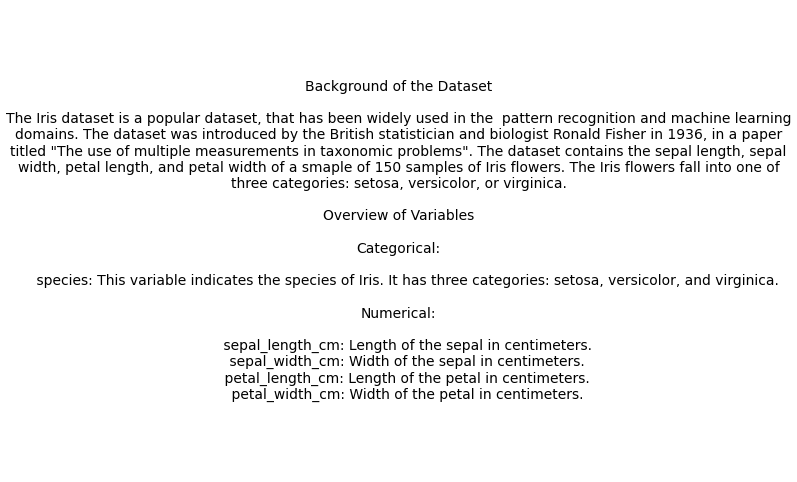

In [72]:

background_text = """ 
Background of the Dataset

The Iris dataset is a popular dataset, that has been widely used in the  pattern recognition and machine learning domains. The dataset was introduced by the British statistician and biologist Ronald Fisher in 1936, in a paper titled "The use of multiple measurements in taxonomic problems". The dataset contains the sepal length, sepal width, petal length, and petal width of a smaple of 150 samples of Iris flowers. The Iris flowers fall into one of three categories: setosa, versicolor, or virginica.

Overview of Variables

Categorical:

    species: This variable indicates the species of Iris. It has three categories: setosa, versicolor, and virginica.

Numerical:

    sepal_length_cm: Length of the sepal in centimeters.
    sepal_width_cm: Width of the sepal in centimeters.
    petal_length_cm: Length of the petal in centimeters.
    petal_width_cm: Width of the petal in centimeters.
""" # Creating the Markdown text that will be outputted as a png file to a folder.

plt.figure(figsize=(8, 6)) # Setting the size of the plot/ output.
# Adding text to the plot 
plt.text(0.5, 0.5, # Designating the co-ordinates of the text
        background_text, # Using the text created previously
        va='center', # Centring the text vertically
        ha='center', # Centring the text horizontally
        wrap=True) # Setting the text to wrap in case it doesn't fit on the plot
plt.axis('off') # Turing off the axis lines
plt.savefig(os.path.join(sum_path, 'background.png',), # Saving the figure to the folder designated previously
             dpi=300, # Setting the resolution of the image
             bbox_inches='tight', # Setting the bounding box to fit the plot area
             pad_inches=0.1) # Setting the padding around the plot 
plt.show() # Showing the plot

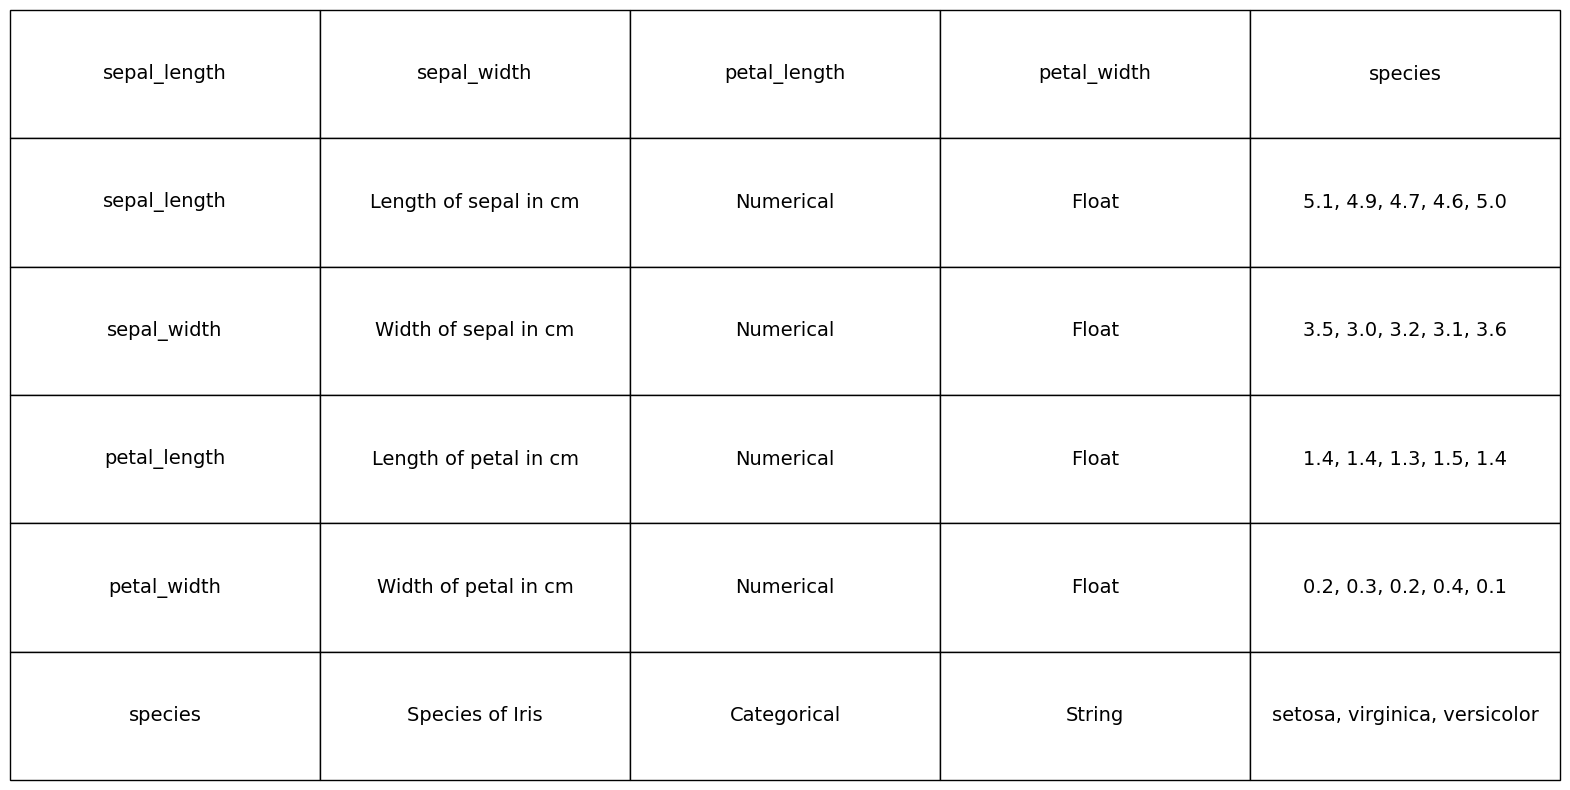

In [73]:
# Creating a table to display Variable Name/ Brief Description/ Variable Type/ Data Type & Sample Data.
data = [
    ["sepal_length", "Length of sepal in cm", "Numerical", "Float", "5.1, 4.9, 4.7, 4.6, 5.0"],
    ["sepal_width", "Width of sepal in cm", "Numerical", "Float", "3.5, 3.0, 3.2, 3.1, 3.6"],
    ["petal_length", "Length of petal in cm", "Numerical", "Float", "1.4, 1.4, 1.3, 1.5, 1.4"],
    ["petal_width", "Width of petal in cm", "Numerical", "Float", "0.2, 0.3, 0.2, 0.4, 0.1"],
    ["species", "Species of Iris", "Categorical", "String", "setosa, virginica, versicolor"]
] # Creating a list of lists, whereby each list represents a row in the table and then each list contains a value for Variable Name/ Brief Description/ Variable Type/ Data Type & Sample Data..

df_desc = pd.DataFrame(data, columns=["Variable", "Description", "Variable Type", "Data Type", "Sample Data"]) # Creating a data frame from the data created in the previous step and passing on the headers for the columns
# Creating a formatted table using the tabulate library
tabular_data = tabulate(df_desc, # Setting the data I want to use
                        tablefmt='pipe') # Using the pipe format for styling the table i.e colons to indicate alignment of the columns

fig, ax = plt.subplots(figsize=(20, 10)) # Creating a sub plot.
ax.axis('tight') # Setting the axis to be just about big enough to show all data.
ax.axis('off') # Turning the axis formatting off
table = ax.table(cellText=df_desc.values, # Creating the table and specifying the data to be used
        colLabels=df.columns, # Specifies the column labels
        bbox=[0,0,1,1], # Setting it so the table expands the full figure
        colLoc='center', # Centering the columns
        cellLoc='center') # Centering the cell values

table.auto_set_font_size(False) # Disabling the adjustment of the font size
table.set_fontsize(14) # Setting font size as 14

plt.savefig(os.path.join(sum_path, 'description.png',), # Saving the figure to the folder designated previously
                        dpi=300, # Setting the resolution of the image 
                        bbox_inches='tight', # Setting the bounding box to fit the plot area
                        pad_inches=0.05) # Setting the padding
plt.show() # Showing the plot

**Categorical Variables**

The `species` variable is a categorical variable. The reasoning for this is:

1. The values are qualitative, in that they are not measured in a value that can be measured.
2. There is no means to perform numerical calculations on them.
3. The values cannot be ordered or ranked in any way other than alphabetically.
4. There are only a distinct number of values in the variable.

Additionally, it is a  string as they it is represented by alphabetical characters, is used to categorise and has no non-numeric values.


**Numerical Variables**

The `sepal_length`, `sepal_width`, `petal_length`, and `petal_width` variables are all numerical. The reasoning for this is:

1. The values for these variables are quantitative, in that they are measured with a value that can be measured and the value is a number.
2. Numerical operations can be performed on them.
3. They can be ordered or ranked based on value.

The `sepal_length`, `sepal_width`, `petal_length`, and `petal_width` have a float data type as they can be represented to a number of decimal places and are so in the data collected.


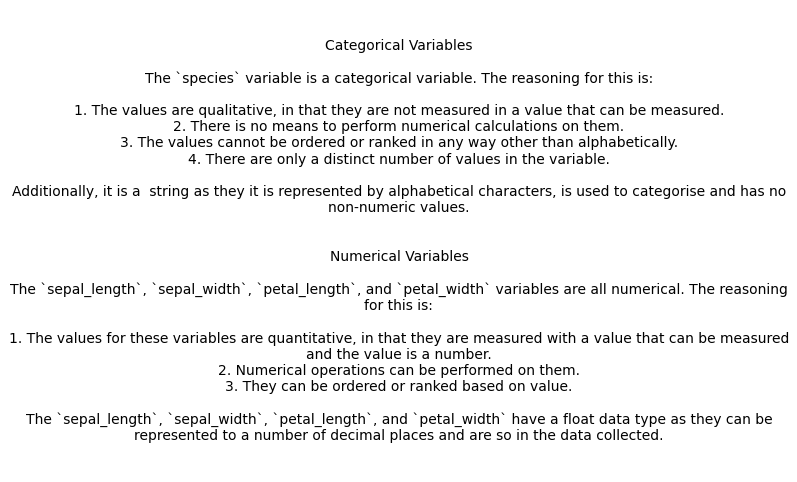

In [74]:
# Markdown content
var_desc_text = """
Categorical Variables

The `species` variable is a categorical variable. The reasoning for this is:

1. The values are qualitative, in that they are not measured in a value that can be measured.
2. There is no means to perform numerical calculations on them.
3. The values cannot be ordered or ranked in any way other than alphabetically.
4. There are only a distinct number of values in the variable.

Additionally, it is a  string as they it is represented by alphabetical characters, is used to categorise and has no non-numeric values.


Numerical Variables

The `sepal_length`, `sepal_width`, `petal_length`, and `petal_width` variables are all numerical. The reasoning for this is:

1. The values for these variables are quantitative, in that they are measured with a value that can be measured and the value is a number.
2. Numerical operations can be performed on them.
3. They can be ordered or ranked based on value.

The `sepal_length`, `sepal_width`, `petal_length`, and `petal_width` have a float data type as they can be represented to a number of decimal places and are so in the data collected.
""" # Creating the Markdown text that will be outputted as a png file to a folder.


plt.figure(figsize=(8, 6))# Setting the size of the plot/ output.
# Setting the size of the plot/ output.
plt.text(0.5, 0.5, # Designating the co-ordinates of the text
        var_desc_text, # Using the text created previously
        va='center', # Centring the text verrtically
        ha='center', # Centring the text horizontally
        wrap=True) # Setting the text to wrap in case it doesn't fit on the plot
plt.axis('off') # Turning the axis off
plt.savefig(os.path.join(sum_path,'variables.png',), # Saving the figure to the folder designated previously
        dpi=300, # Setting the resolution of the image 
        bbox_inches='tight', # Setting the bounding box to fit the plot area
        pad_inches=0.05) # Setting the padding
plt.show() # Showing the plot


In [75]:
df_eda = df.copy(deep=True) # Creating a copy of the data source for doing some exploration

In [76]:
df_eda['petal_area'] = df_eda['petal_length'] * df_eda['petal_width'] # Creating a petal area variable
df_eda['sepal_area'] = df_eda['sepal_length'] * df_eda['sepal_width'] # Creating a sepal area variable

I wanted to be able to calculte the volume of each flower but only had two meaures but needed a third measure. I read an article on [Geeks For Geeks](https://www.geeksforgeeks.org/frustum-of-cone/ "Frustum of A Cone") for calculating the volume of a cone, that I felt could be applied to a flower to calculate its clume, as a flower is a cone shaped object.<br>

Please see the below showing the formula for **Frustum Of A Cone**: <br>
![Frustum Of A Cone](https://www.shutterstock.com/image-vector/frustum-cone-formula-maths-geometric-260nw-2177115457.jpg)

In [77]:
vols = [] # Creating an empty list to store the volumes

# Calculate frustum volume for each row using a for loop
for index, row in df_eda.iterrows():
    h = row['sepal_length'] # Getting the height
    r1 = row['petal_width'] / 2 # Getting the radius of the petal
    r2 = row['sepal_width'] / 2 # Getting the radius of the sepal
    vol = (1/3) * np.pi * h * (r1**2 + r1*r2 + r2**2) # Applying the variables ot the formula 
    vols.append(vol) # Appending each colume to the volumes list

df_eda['flower_volume'] = vols # Adding the volumes to the dataframe

print(df_eda.head()) # Printing the head of the data frame

   sepal_length  sepal_width  petal_length  petal_width species  petal_area  sepal_area  flower_volume
0           5.1          3.5           1.4          0.2  setosa        0.28       17.85      17.343948
1           4.9          3.0           1.4          0.2  setosa        0.28       14.70      12.366356
2           4.7          3.2           1.3          0.2  setosa        0.26       15.04      13.436592
3           4.6          3.1           1.5          0.2  setosa        0.30       14.26      12.367927
4           5.0          3.6           1.4          0.2  setosa        0.28       18.00      17.959438


In [78]:
#Creating a function for assigning the label to the bar chart
def bar_label(ax): # Defining the function and its input
    for i in ax.patches: # Looping through each bar in the barplot.
        # Using the .annotate element to add text to the graph. 
        ax.annotate(format(i.get_height(), '.2f'), # Getting the height to 2 decimal places. .get_height will return the height of the bar. This is done for all bars in the graph as its a for loop.
                    # .get_x will return the x-coordinate of the left hand side of each bar/ .get_width returns the width of the bar.
                    # First getting the x-cord of the left hand side and adding the width. Then dividing by 2 to centre where the text should be.
                       (i.get_x() + i.get_width() / 2., i.get_height()), # get_height is used to denote where on the Y axis the text should be
                       ha = 'center', va = 'center', # Aligning the text to be horizontally and vertically centred.
                       size=18, # Denoting the font size of the text to be 18.
                       # Setting the coordinates of the text on the x axis to be 0, as I am happy with the text being centred.
                       xytext = (0, -14),  # Setting the coordinates of text on the y axis to be -14, as I would like the text to be just below the top of the bar.
                       textcoords = 'offset points') # Offsetting the text from reference points.

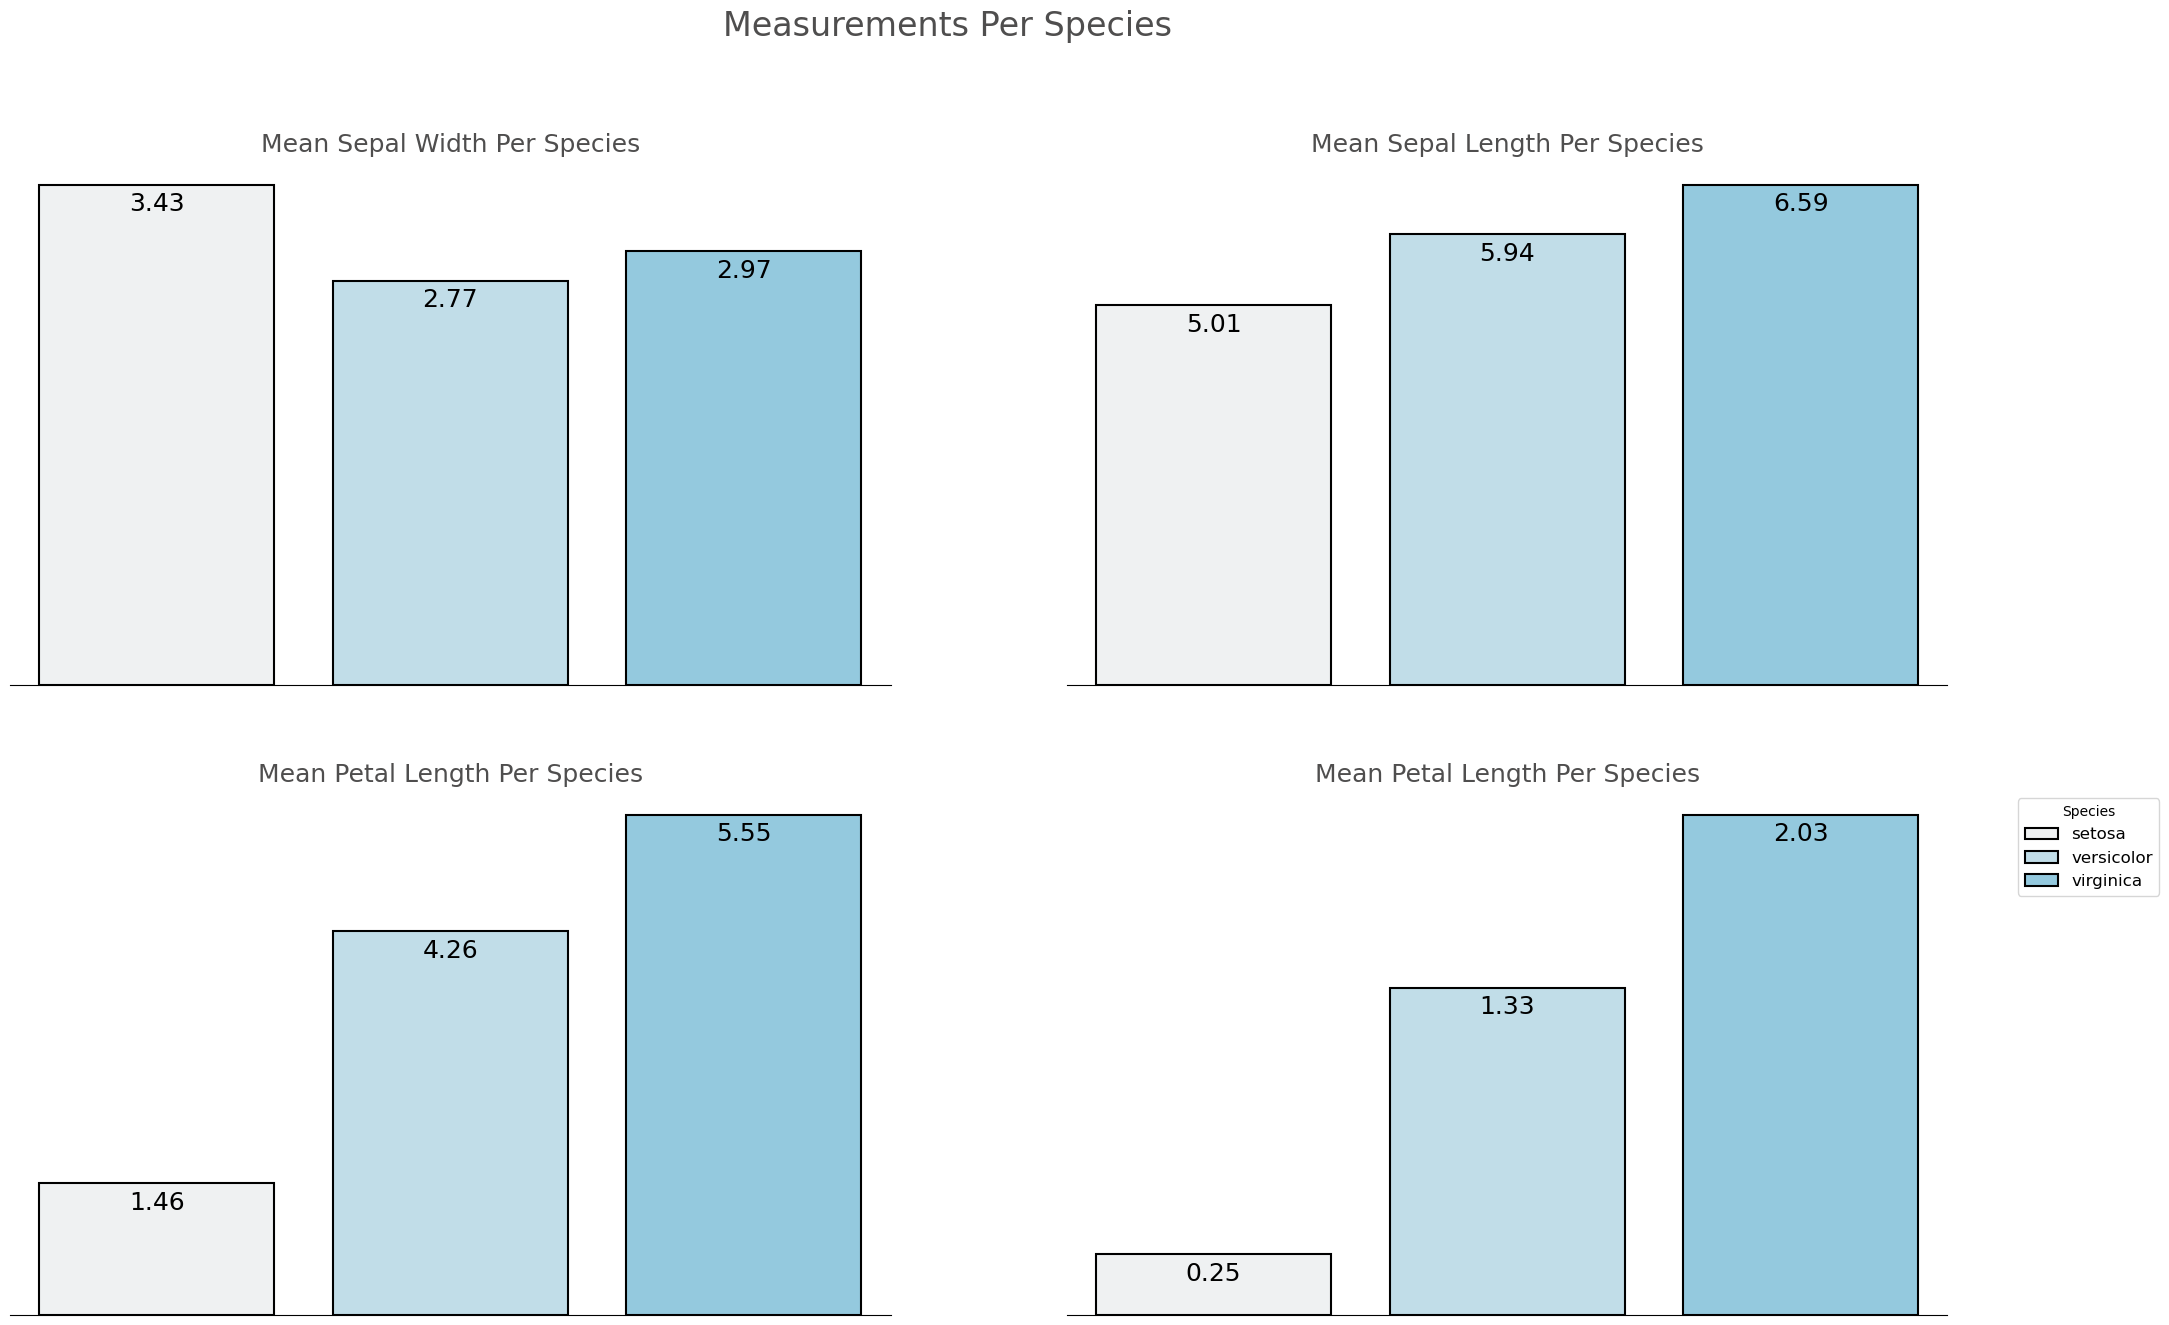

In [79]:
plt.figure(figsize=(25, 15)) # Setting the size of the figure

# Plot for sepal width
plt.subplot(2, 2, 1) # Setting on what sub plot the graph should be positioned
ax_1 = sns.barplot(data=df, # Using the data from the dataframe created
                  x="species", # Setting species to be on the x-axis
                  y="sepal_width",  # Setting sepal width to be on the y-axis
                  hue="species", # Setting species to be the colour of the bars
                  color='skyblue', # Setting the color to be Sky Blue
                  edgecolor='black', # Adding a feint black line around the bars for display purposes
                  errorbar=None, # Removing the error bar from the graph
                  dodge=False, # Turning off dodge on the plot so the display looks neater
                  linewidth=1.5) # Setting the line width of the black line around the bars.
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Sepal Width Per Species', # Setting the name of the plot
           size=18, # Setting the font size of the plot
           color='#4f4e4e') # Setting the color of the title
ax_1.legend_.remove() # Removing the individual legend from the plot

# Plot for sepal length
plt.subplot(2, 2, 2) # Setting on what sub plot the graph should be positioned
ax_2 = sns.barplot(data=df, # Using the data from the dataframe created
                  x="species", # Setting species to be on the x-axis
                  y="sepal_length",  # Setting sepal length to be on the y-axis
                  hue="species", # Setting species to be the colour of the bars
                  color='skyblue', # Setting the color to be Sky Blue
                  edgecolor='black', # Adding a feint black line around the bars for display purposes
                  errorbar=None, # Removing the error bar from the graph
                  dodge=False, # Turning off dodge on the plot so the display looks neater
                  linewidth=1.5) # Setting the line width of the black line around the bars.
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Sepal Length Per Species', # Setting the name of the plot
           size=18, # Setting the font size of the plot
           color='#4f4e4e') # Setting the color of the title
ax_2.legend_.remove() # Removing the individual legend from the plot

# Plot for petal length
plt.subplot(2, 2, 3) # Setting on what sub plot the graph should be positioned
ax_3 = sns.barplot(data=df, # Using the data from the dataframe created
                  x="species", # Setting species to be on the x-axis
                  y="petal_length",  # Setting petal length to be on the y-axis
                  hue="species", # Setting species to be the colour of the bars
                  color='skyblue', # Setting the color to be Sky Blue
                  edgecolor='black', # Adding a feint black line around the bars for display purposes
                  errorbar=None, # Removing the error bar from the graph
                  dodge=False, # Turning off dodge on the plot so the display looks neater
                  linewidth=1.5) # Setting the line width of the black line around the bars.
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Petal Length Per Species', # Setting the name of the plot
           size=18, # Setting the font size of the plot
           color='#4f4e4e') # Setting the color of the title
ax_3.legend_.remove() # Removing the individual legend from the plot

# Plot for petal width
plt.subplot(2, 2, 4) # Setting on what sub plot the graph should be positioned
ax_4 = sns.barplot(data=df, # Using the data from the dataframe created
                  x="species", # Setting species to be on the x-axis
                  y="petal_width",  # Setting petal width to be on the y-axis
                  hue="species", # Setting species to be the colour of the bars
                  color='skyblue', # Setting the color to be Sky Blue
                  edgecolor='black', # Adding a feint black line around the bars for display purposes
                  errorbar=None, # Removing the error bar from the graph
                  dodge=False, # Turning off dodge on the plot so the display looks neater
                  linewidth=1.5) # Setting the line width of the black line around the bars.
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Petal Length Per Species', # Setting the name of the plot
           size=18, # Setting the font size of the plot
           color='#4f4e4e') # Setting the color of the title
ax_4.legend(title="Species", loc='upper right', bbox_to_anchor=(1.25, 1), fontsize='large') # Add a single legend with larger font size
sns.despine(left=True) # Using the despine function to remove the axis lines on the left hand side

# Add a title to the figure
plt.suptitle('Measurements Per Species', size=24, color='#4f4e4e') # Setting the overall title of the graph

bar_label(ax_1) # Applying the function to the plot
bar_label(ax_2) # Applying the function to the plot
bar_label(ax_3) # Applying the function to the plot
bar_label(ax_4) # Applying the function to the plot

# Show plot
plt.savefig(os.path.join(exp_path, 'Bar Chart.png')) # Saving the plot to the desired folder
plt.show() # Showing the plot


### Distribution

In [80]:
std_dev = np.std(df['sepal_length']) # First using the Numpy .std Function to get the standard deviation of the Sepal Length variable.
data_points_num = len(df['sepal_length']) # Calculating the number of data points/ values in the data source.

# Calculate bin width using Scott's rule.
# Applying the formula with the standard deviation and number of data points.
# First part of the Calculation is multiplying the Std Dev by 3.5.
# Then the 2nd part of the calculation is getting the cube root of the number of data points.
bin_width = 3.5 * std_dev / (data_points_num ** (1/3))  # Finally dividing the result of the first calculation by the second part to get the optimal bin width.
# Then to see how many bins we need to have, we need to get the range of values from the min value to the max value.
data_range = np.max(df['sepal_length']) - np.min(df['sepal_length']) # To get this we use the Numpy Max & Min functions and take the MIN value away from the max Value.
num_bins = round(float(data_range / bin_width)) # To identify the number of bins we divide the range calculated by the optimal bin width. Using Round to get to the nearest whole number.

print("Bin Width based on Scott's rule:", num_bins) # Printing the optimal number of bins.

Bin Width based on Scott's rule: 7


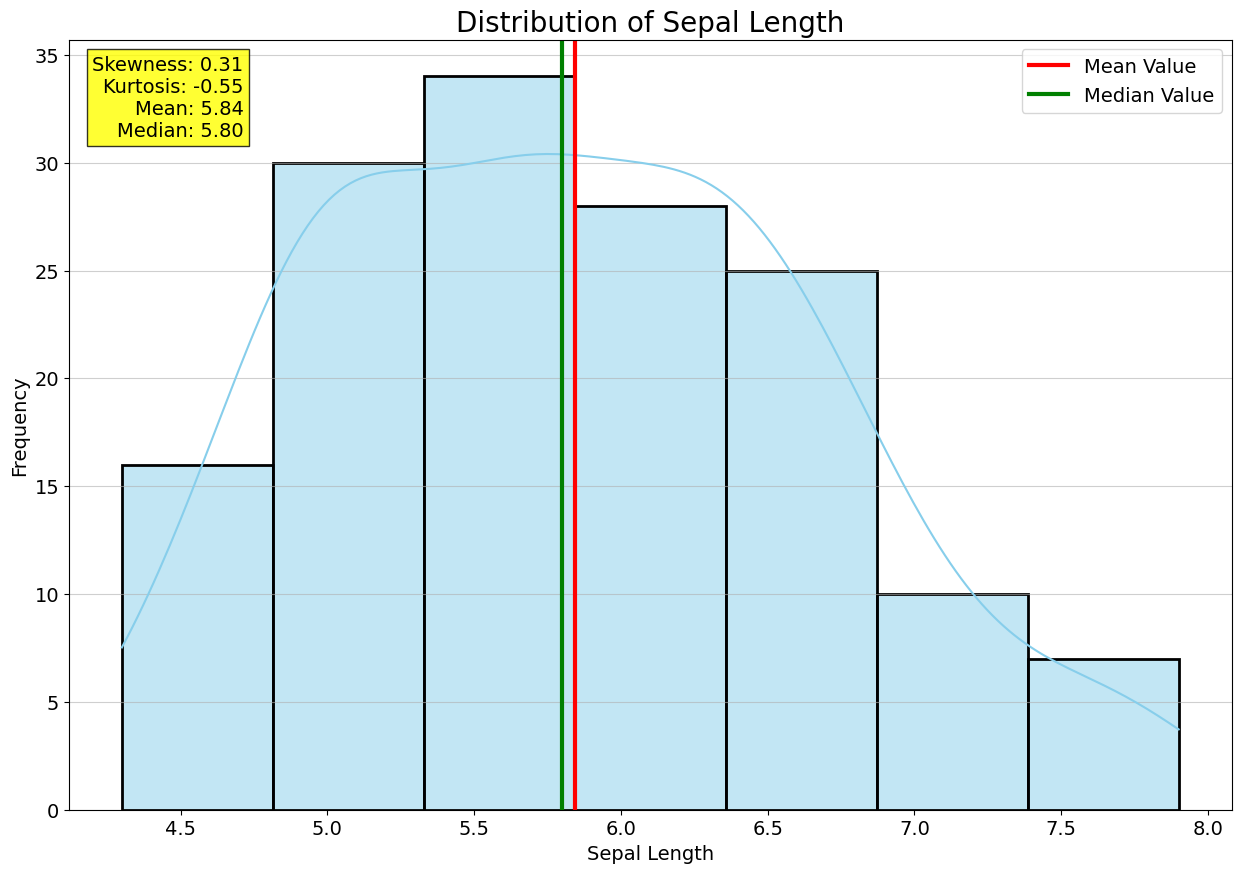

In [81]:
plt.figure(figsize=(15, 10))  # Setting the size of the plot

# Plotting the distribution
sns.histplot(df['sepal_length'], # Plotting a histogram using the sepal length
            kde=True, # Setting the kernel density estimate to be true to visualise the distribution
            bins=7, # Setting the number of bins based off of Scotts Rule
            color='skyblue', # Setting the color of the histograms
            edgecolor='black', # Setting a black line around the hidtograms
            linewidth=2) # Setting the width of the black line

# Plot formatting
plt.title('Distribution of Sepal Length', size=20) # Setting the title and size of the title
plt.xlabel('Sepal Length', size=14) # Setting the X-Axis Title and size of the title
plt.ylabel('Frequency', size=14) # Setting the Y-Axis Title and size of the title
plt.xticks(size=14) # Setting the size of the tick marks on the X-Axis
plt.yticks(size=14) #Setting the size of the tick marks on the Y-Axis
plt.grid(axis='y', # Adding grid lines to the y-axis
        linestyle='-', # Setting the style of the grid lines
        alpha=0.6) # Setting the transparency of the grid lines

# Adding mean and median lines
plt.axvline(x=df['sepal_length'].mean(), # Adding a vertical line to the x-axis of the mean of sepal length
            label='Mean Value', # Setting the title of the line
            color='red', # Setting the color of the line
            linewidth=3, # Setting the width of the line
            linestyle='-') # Setting the style of the line
plt.axvline(x=df['sepal_length'].median(), # Adding a vertical line to the x-axis of the median of sepal length
            label='Median Value', # Setting the title of the line
            color='green', # Setting the color of the line
            linewidth=3, # Setting the width of the line
            linestyle='-') # Setting the style of the line
plt.legend(fontsize=14) # Setting the font size of the legend

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['sepal_length'].mean() # Calculating the mean of the sepal length
median = df['sepal_length'].median() # Calculating the median of the sepal length
skewness = df['sepal_length'].skew() # Calculating the skewness of the sepal length
kurtosis = df['sepal_length'].kurt() # Calculating the kurtosis of the sepal length

plt.text(0.15, 0.98, #Adding text to the plot
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', # Formatting the Skewness/ Kurtosis/ Mean & Median
         transform=plt.gca().transAxes, # Getting the current axis instance interpreting the coordinates relative to the axes of the plot
         fontsize=14, # Setting the font size
         bbox=dict(facecolor='yellow', alpha=0.8), #Setting the color of the line and the transparency
         verticalalignment='top', horizontalalignment='right') # Setting the text to be aligned to the top right hand side of the plot

plt.show() # Showing the plot

In [82]:
std_dev = np.std(df['sepal_width']) # First using the Numpy .std Function to get the standard deviation of the Sepal Length variable.
data_points_num = len(df['sepal_width']) # Calculating the number of data points/ values in the data source.

# Calculate bin width using Scott's rule.
# Applying the formula with the standard deviation and number of data points.
# First part of the Calculation is multiplying the Std Dev by 3.5.
# Then the 2nd part of the calculation is getting the cube root of the number of data points.
bin_width = 3.5 * std_dev / (data_points_num ** (1/3))  # Finally dividing the result of the first calculation by the second part to get the optimal bin width.
# Then to see how many bins we need to have, we need to get the range of values from the min value to the max value.
data_range = np.max(df['sepal_width']) - np.min(df['sepal_width']) # To get this we use the Numpy Max & Min functions and take the MIN value away from the max Value.
num_bins = round(float(data_range / bin_width)) # To identify the number of bins we divide the range calculated by the optimal bin width. Using Round to get to the nearest whole number.

print("Bin Width based on Scott's rule:", num_bins) # Printing the optimal number of bins.

Bin Width based on Scott's rule: 8


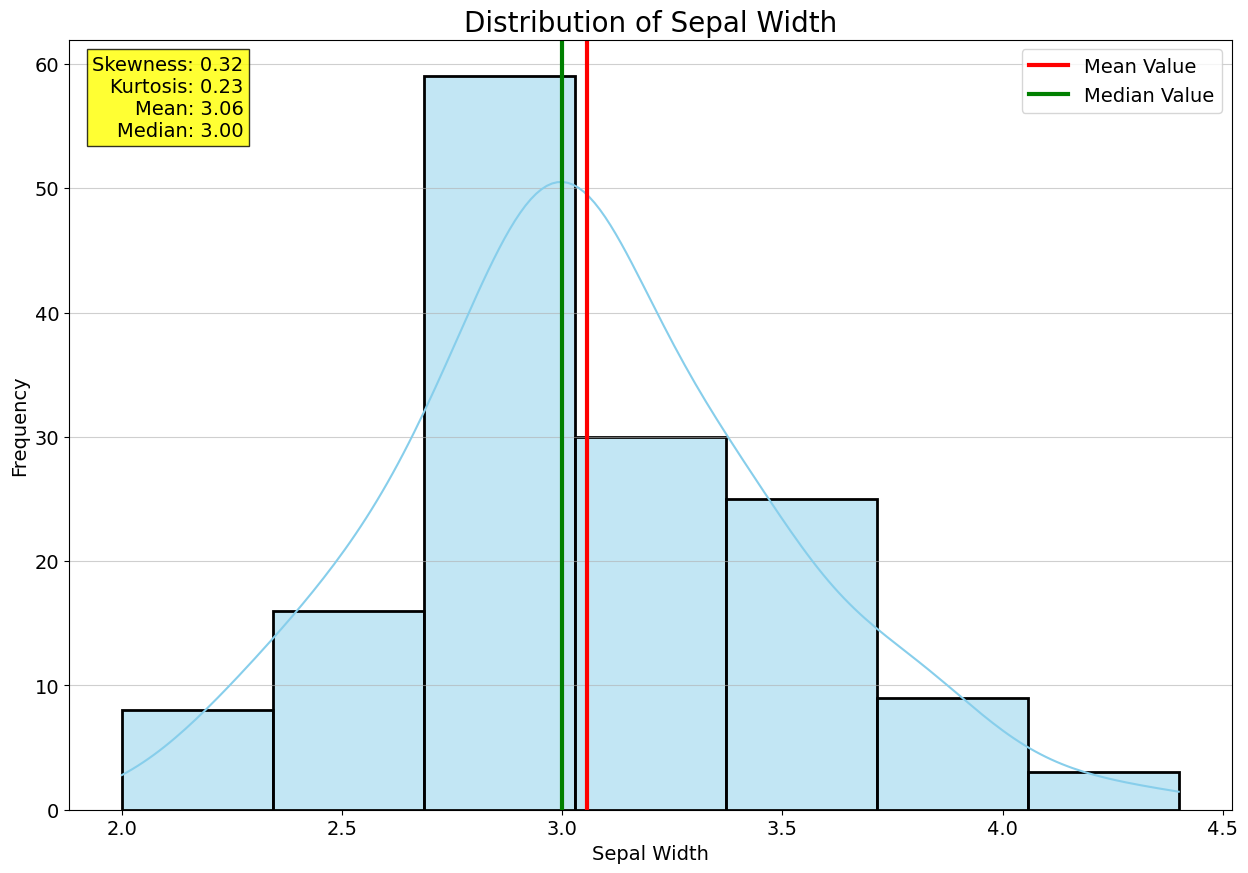

In [104]:
plt.figure(figsize=(15, 10))  # Setting the size of the plot

# Plotting the distribution
sns.histplot(df['sepal_width'], # Plotting a histogram using the sepal width
            kde=True, # Setting the kernel density estimate to be true to visualise the distribution
            bins=7, # 8etting the number of bins based off of Scotts Rule
            color='skyblue', # Setting the color of the histograms
            edgecolor='black', # Setting a black line around the hidtograms
            linewidth=2) # Setting the width of the black line

# Plot formatting
plt.title('Distribution of Sepal Width', size=20) # Setting the title and size of the title
plt.xlabel('Sepal Width', size=14) # Setting the X-Axis Title and size of the title
plt.ylabel('Frequency', size=14) # Setting the Y-Axis Title and size of the title
plt.xticks(size=14) # Setting the size of the tick marks on the X-Axis
plt.yticks(size=14) #Setting the size of the tick marks on the Y-Axis
plt.grid(axis='y', # Adding grid lines to the y-axis
        linestyle='-', # Setting the style of the grid lines
        alpha=0.6) # Setting the transparency of the grid lines

# Adding mean and median lines
plt.axvline(x=df['sepal_width'].mean(), # Adding a vertical line to the x-axis of the mean of sepal width
            label='Mean Value', # Setting the title of the line
            color='red', # Setting the color of the line
            linewidth=3, # Setting the width of the line
            linestyle='-') # Setting the style of the line
plt.axvline(x=df['sepal_width'].median(), # Adding a vertical line to the x-axis of the median of sepal width
            label='Median Value', # Setting the title of the line
            color='green', # Setting the color of the line
            linewidth=3, # Setting the width of the line
            linestyle='-') # Setting the style of the line
plt.legend(fontsize=14) # Setting the font size of the legend

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['sepal_width'].mean() # Calculating the mean of the sepal width
median = df['sepal_width'].median() # Calculating the median of the sepal width
skewness = df['sepal_width'].skew() # Calculating the skewness of the sepal width
kurtosis = df['sepal_width'].kurt() # Calculating the kurtosis of the sepal width

plt.text(0.15, 0.98, #Adding text to the plot
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', # Formatting the Skewness/ Kurtosis/ Mean & Median
         transform=plt.gca().transAxes, # Getting the current axis instance interpreting the coordinates relative to the axes of the plot
         fontsize=14, # Setting the font size
         bbox=dict(facecolor='yellow', alpha=0.8), #Setting the color of the line and the transparency
         verticalalignment='top', horizontalalignment='right') # Setting the text to be aligned to the top right hand side of the plot

plt.show() # Showing the plot

In [84]:
std_dev = np.std(df['petal_length']) # First using the Numpy .std Function to get the standard deviation of the Petal Length variable.
data_points_num = len(df['petal_length']) # Calculating the number of data points/ values in the data source.

# Calculate bin width using Scott's rule.
# Applying the formula with the standard deviation and number of data points.
# First part of the Calculation is multiplying the Std Dev by 3.5.
# Then the 2nd part of the calculation is getting the cube root of the number of data points.
bin_width = 3.5 * std_dev / (data_points_num ** (1/3))  # Finally dividing the result of the first calculation by the second part to get the optimal bin width.
# Then to see how many bins we need to have, we need to get the range of values from the min value to the max value.
data_range = np.max(df['petal_length']) - np.min(df['petal_length']) # To get this we use the Numpy Max & Min functions and take the MIN value away from the max Value.
num_bins = round(float(data_range / bin_width)) # To identify the number of bins we divide the range calculated by the optimal bin width. Using Round to get to the nearest whole number.

print("Bin Width based on Scott's rule:", num_bins) # Printing the optimal number of bins.

Bin Width based on Scott's rule: 5


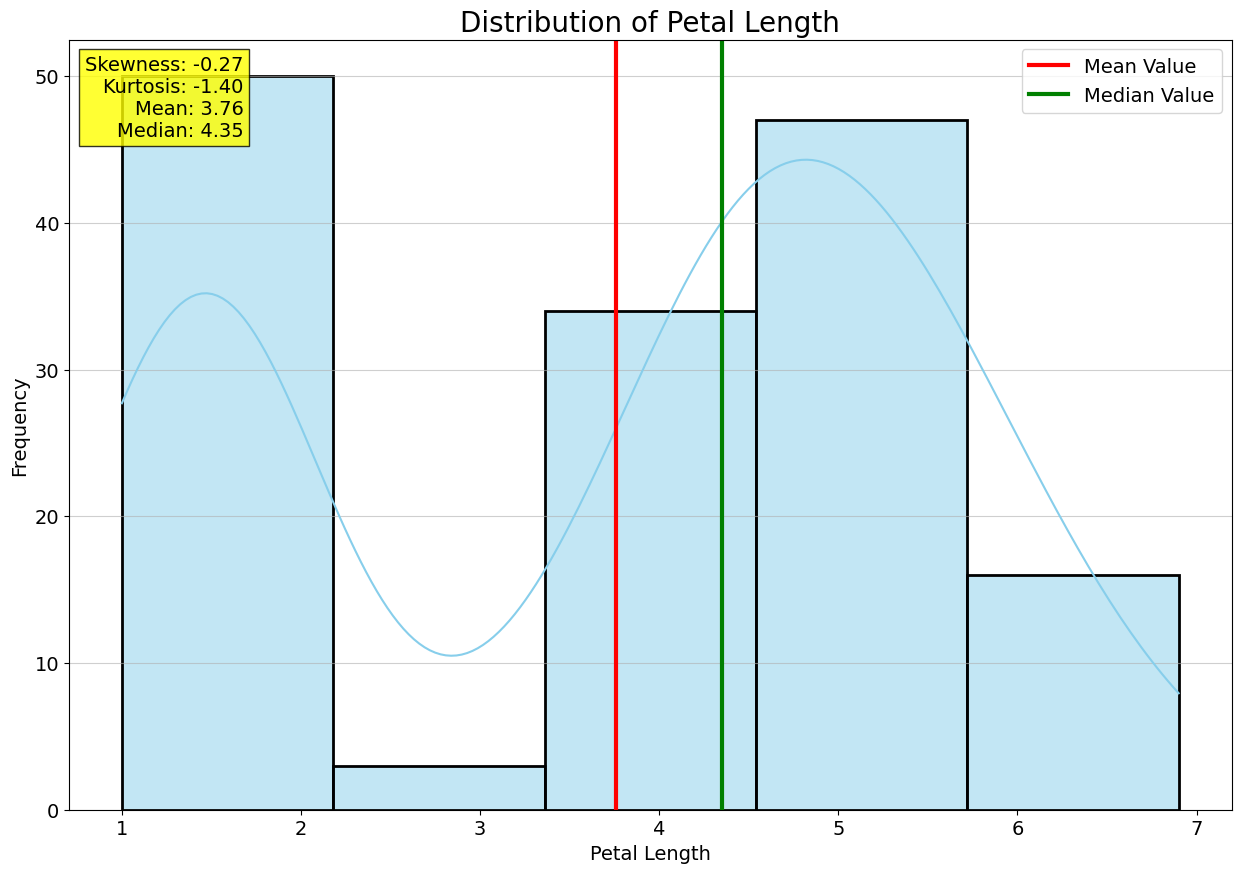

In [105]:
plt.figure(figsize=(15, 10))  # Setting the size of the plot

# Plotting the distribution
sns.histplot(df['petal_length'], # Plotting a histogram using the petal length
            kde=True, # Setting the kernel density estimate to be true to visualise the distribution
            bins=5, # Setting the number of bins based off of Scotts Rule
            color='skyblue', # Setting the color of the histograms
            edgecolor='black', # Setting a black line around the hidtograms
            linewidth=2) # Setting the width of the black line

# Plot formatting
plt.title('Distribution of Petal Length', size=20) # Setting the title and size of the title
plt.xlabel('Petal Length', size=14) # Setting the X-Axis Title and size of the title
plt.ylabel('Frequency', size=14) # Setting the Y-Axis Title and size of the title
plt.xticks(size=14) # Setting the size of the tick marks on the X-Axis
plt.yticks(size=14) #Setting the size of the tick marks on the Y-Axis
plt.grid(axis='y', # Adding grid lines to the y-axis
        linestyle='-', # Setting the style of the grid lines
        alpha=0.6) # Setting the transparency of the grid lines

# Adding mean and median lines
plt.axvline(x=df['petal_length'].mean(), # Adding a vertical line to the x-axis of the mean of petal length
            label='Mean Value', # Setting the title of the line
            color='red', # Setting the color of the line
            linewidth=3, # Setting the width of the line
            linestyle='-') # Setting the style of the line
plt.axvline(x=df['petal_length'].median(), # Adding a vertical line to the x-axis of the median of petal length
            label='Median Value', # Setting the title of the line
            color='green', # Setting the color of the line
            linewidth=3, # Setting the width of the line
            linestyle='-') # Setting the style of the line
plt.legend(fontsize=14) # Setting the font size of the legend

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['petal_length'].mean() # Calculating the mean of the petal length
median = df['petal_length'].median() # Calculating the median of the petal length
skewness = df['petal_length'].skew() # Calculating the skewness of the petal length
kurtosis = df['petal_length'].kurt() # Calculating the kurtosis of the petal length

plt.text(0.15, 0.98, #Adding text to the plot
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', # Formatting the Skewness/ Kurtosis/ Mean & Median
         transform=plt.gca().transAxes, # Getting the current axis instance interpreting the coordinates relative to the axes of the plot
         fontsize=14, # Setting the font size
         bbox=dict(facecolor='yellow', alpha=0.8), #Setting the color of the line and the transparency
         verticalalignment='top', horizontalalignment='right') # Setting the text to be aligned to the top right hand side of the plot

plt.show() # Showing the plot

In [86]:
std_dev = np.std(df['petal_width']) # First using the Numpy .std Function to get the standard deviation of the Petal Width variable.
data_points_num = len(df['petal_width']) # Calculating the number of data points/ values in the data source.

# Calculate bin width using Scott's rule.
# Applying the formula with the standard deviation and number of data points.
# First part of the Calculation is multiplying the Std Dev by 3.5.
# Then the 2nd part of the calculation is getting the cube root of the number of data points.
bin_width = 3.5 * std_dev / (data_points_num ** (1/3))  # Finally dividing the result of the first calculation by the second part to get the optimal bin width.
# Then to see how many bins we need to have, we need to get the range of values from the min value to the max value.
data_range = np.max(df['petal_width']) - np.min(df['petal_width']) # To get this we use the Numpy Max & Min functions and take the MIN value away from the max Value.
num_bins = round(float(data_range / bin_width)) # To identify the number of bins we divide the range calculated by the optimal bin width. Using Round to get to the nearest whole number.

print("Bin Width based on Scott's rule:", num_bins) # Printing the optimal number of bins.

Bin Width based on Scott's rule: 5


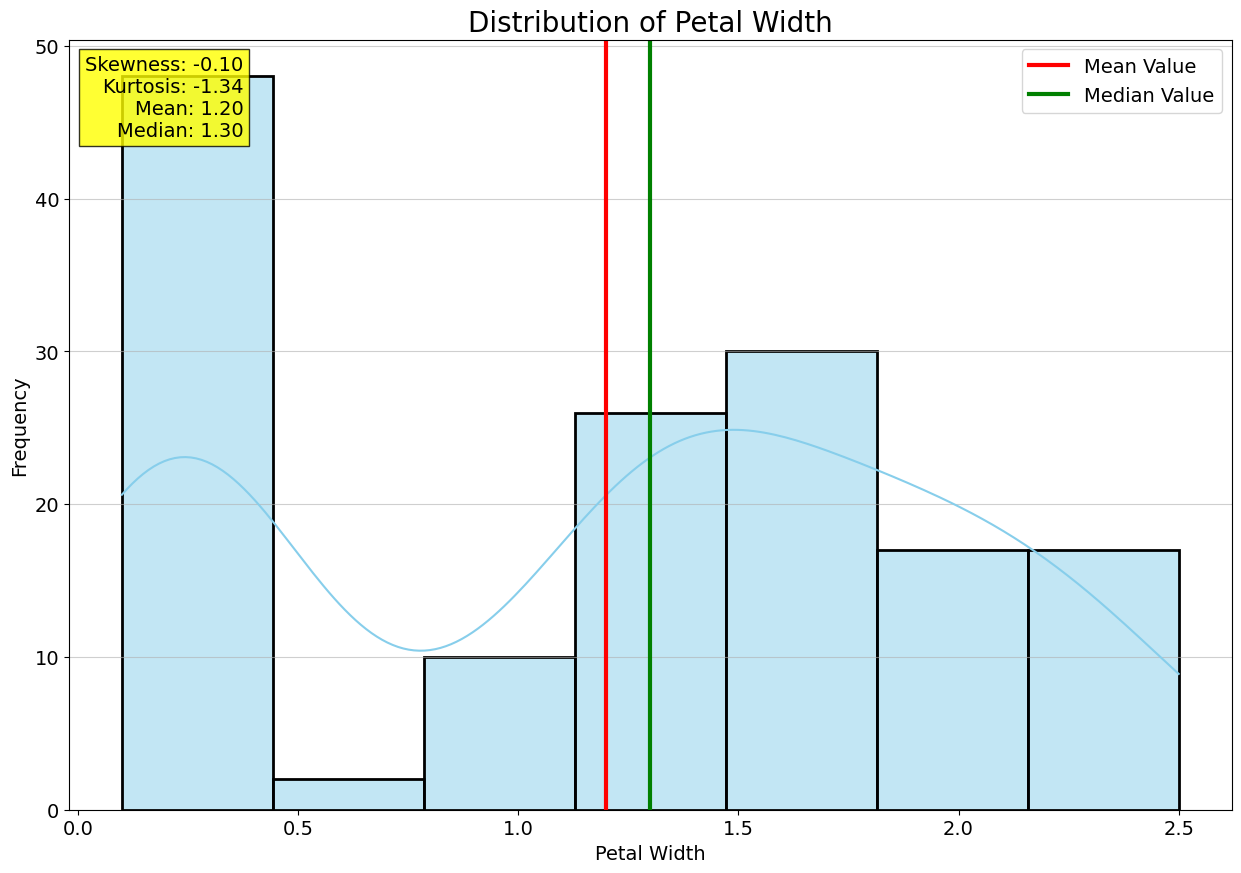

In [106]:
plt.figure(figsize=(15, 10))  # Setting the size of the plot

# Plotting the distribution
sns.histplot(df['petal_width'], # Plotting a histogram using the petal width
            kde=True, # Setting the kernel density estimate to be true to visualise the distribution
            bins=7, # Setting the number of bins based off of Scotts Rule
            color='skyblue', # Setting the color of the histograms
            edgecolor='black', # Setting a black line around the hidtograms
            linewidth=2) # Setting the width of the black line

# Plot formatting
plt.title('Distribution of Petal Width', size=20) # Setting the title and size of the title
plt.xlabel('Petal Width', size=14) # Setting the X-Axis Title and size of the title
plt.ylabel('Frequency', size=14) # Setting the Y-Axis Title and size of the title
plt.xticks(size=14) # Setting the size of the tick marks on the X-Axis
plt.yticks(size=14) #Setting the size of the tick marks on the Y-Axis
plt.grid(axis='y', # Adding grid lines to the y-axis
        linestyle='-', # Setting the style of the grid lines
        alpha=0.6) # Setting the transparency of the grid lines

# Adding mean and median lines
plt.axvline(x=df['petal_width'].mean(), # Adding a vertical line to the x-axis of the mean of petal width
            label='Mean Value', # Setting the title of the line
            color='red', # Setting the color of the line
            linewidth=3, # Setting the width of the line
            linestyle='-') # Setting the style of the line
plt.axvline(x=df['petal_width'].median(), # Adding a vertical line to the x-axis of the median of petal width
            label='Median Value', # Setting the title of the line
            color='green', # Setting the color of the line
            linewidth=3, # Setting the width of the line
            linestyle='-') # Setting the style of the line
plt.legend(fontsize=14) # Setting the font size of the legend

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['petal_width'].mean() # Calculating the mean of the petal width
median = df['petal_width'].median() # Calculating the median of the petal width
skewness = df['petal_width'].skew() # Calculating the skewness of the petal width
kurtosis = df['petal_width'].kurt() # Calculating the kurtosis of the petal width

plt.text(0.15, 0.98, #Adding text to the plot
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', # Formatting the Skewness/ Kurtosis/ Mean & Median
         transform=plt.gca().transAxes, # Getting the current axis instance interpreting the coordinates relative to the axes of the plot
         fontsize=14, # Setting the font size
         bbox=dict(facecolor='yellow', alpha=0.8), #Setting the color of the line and the transparency
         verticalalignment='top', horizontalalignment='right') # Setting the text to be aligned to the top right hand side of the plot

plt.show() # Showing the plot

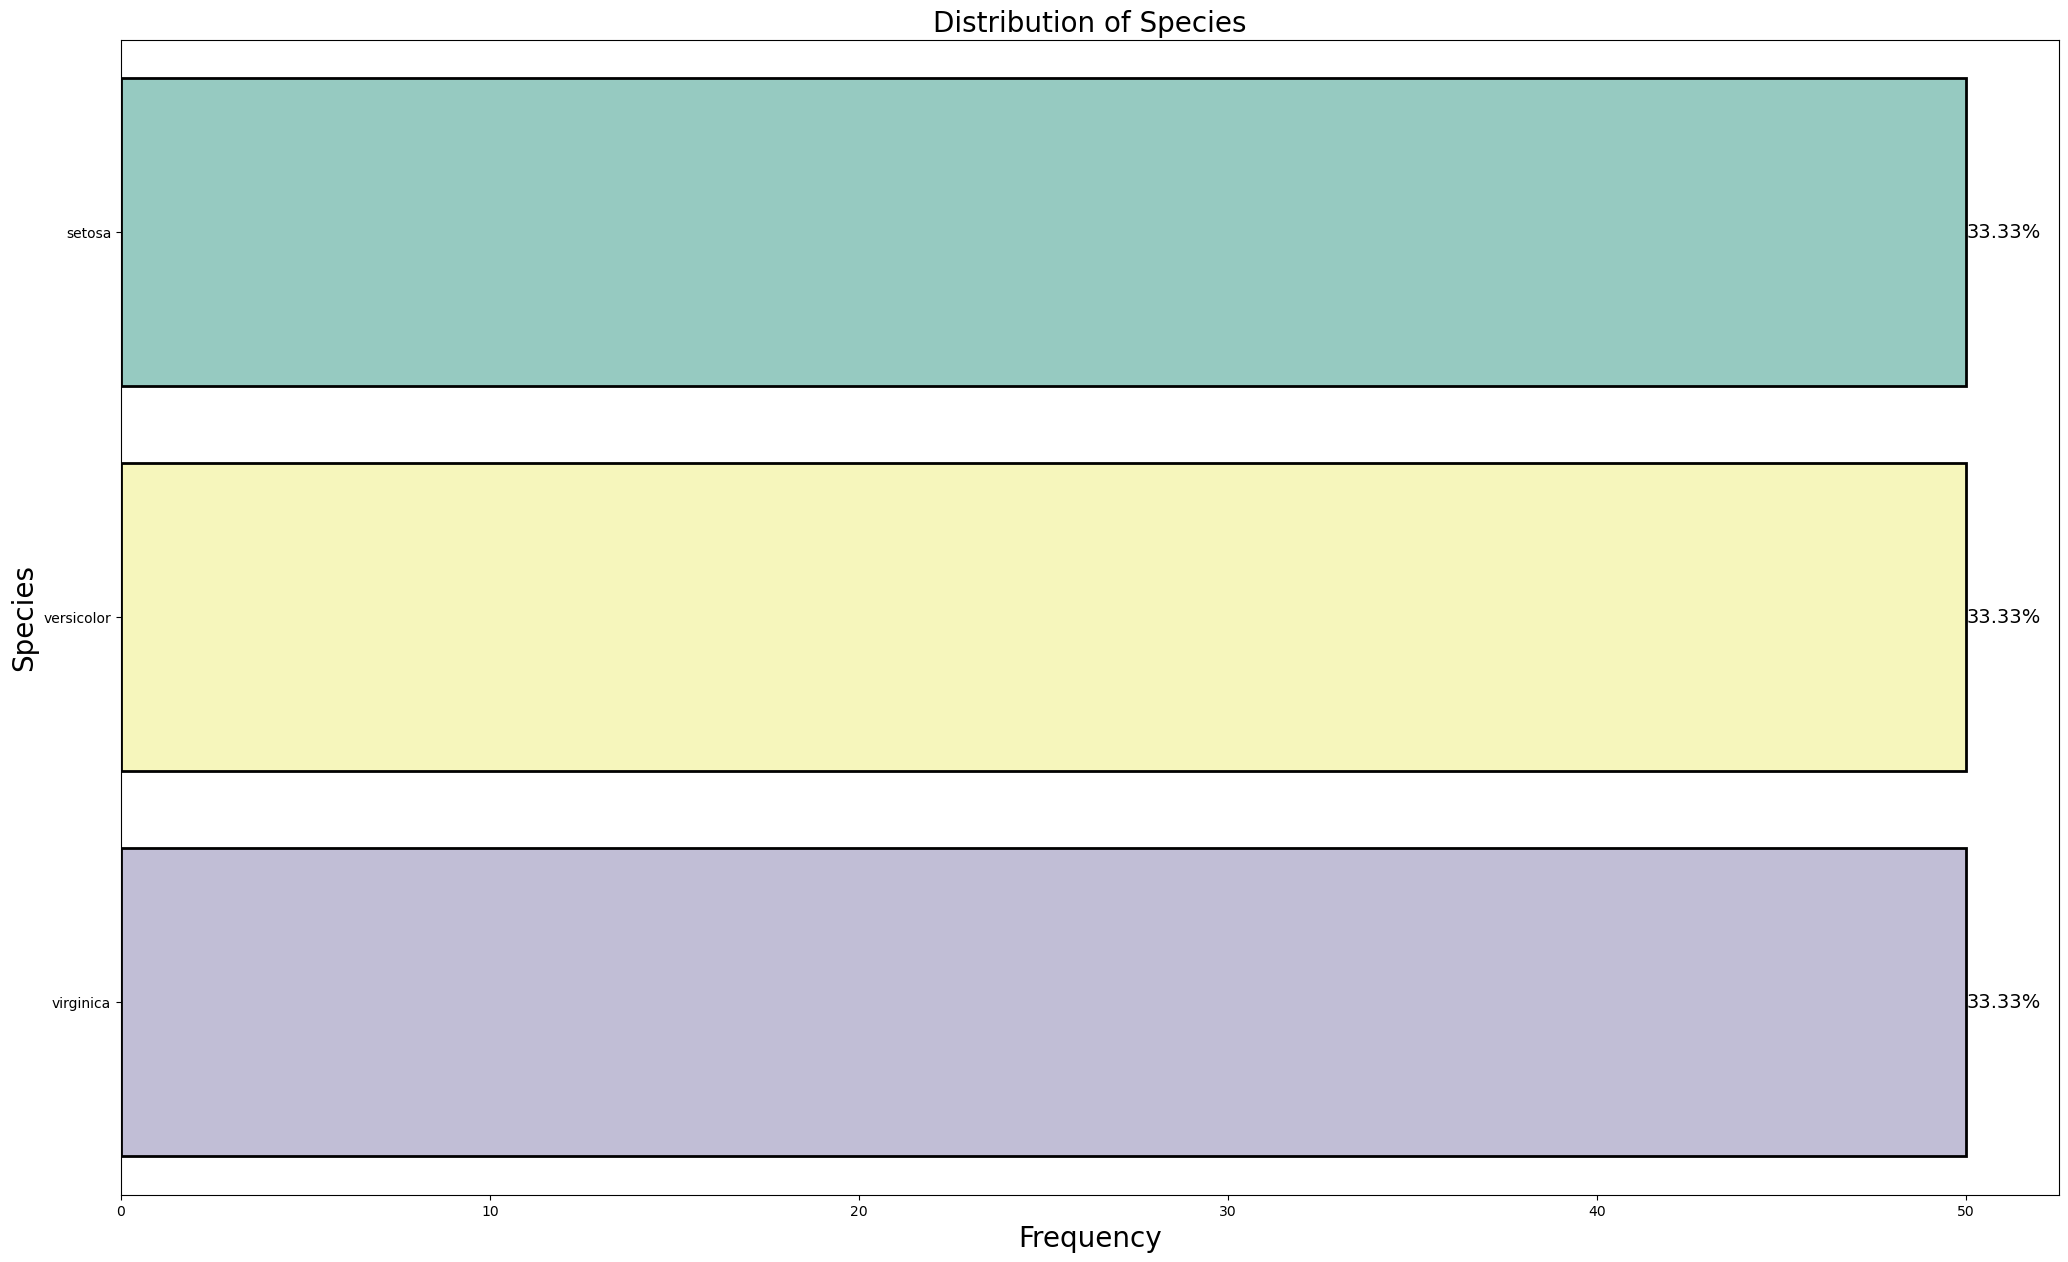

In [88]:
plt.figure(figsize=(25, 15))  # Setting the size of the plot
ax = sns.countplot(data=df, # Creating a Countplot using the data from the data frame created
                   y="species", # Coloring based on the species
                   edgecolor='black',# Creating a black line around the chart
                   palette='Set3', # Setting the color pallette for the chart
                   linewidth=2) # Setting the width of the black line around the charts
plt.title('Distribution of Species', # Setting the plot title
           size=20) # Setting the size of the font
plt.xlabel('Frequency', # Setting the X-axis label
            size=20) # Setting the size of the font
plt.ylabel('Species', # Setting the Y-axis label
            size=20) # Setting the size of the font

total = len(df['species']) # Calculating the number of data points/ values in the data source.
for p in ax.patches: # Using a for loop to get and apply a label to each bar in the plot
    percent = '{:.2f}%'.format(100 * p.get_width()/total) # Getting the percentage value each bar makes up by getting the width of it as a proportion of the total variable. Formatting to 2 decimal places
    x_ax = p.get_width() # Getting the co-ordinates of the x-axis for applying the label
    y_ax = p.get_y() + p.get_height()/2 # Getting the centre point of the bars for applying the label
    ax.annotate(percent, (x_ax, y_ax), # Adding the text to the label/ percent being the text to apply/ x_ax & y_ax beign the coordinates
                ha='left', # Aligning the labels to horizontally left aligned
                va='center', # Aligning the labels to veritcally centrally aligned
                fontsize=14) # Setting the font size

plt.savefig(os.path.join(dist_path, 'CountPlot.png')) # Saving the plot to the desired folder
plt.show() # Showing the plot

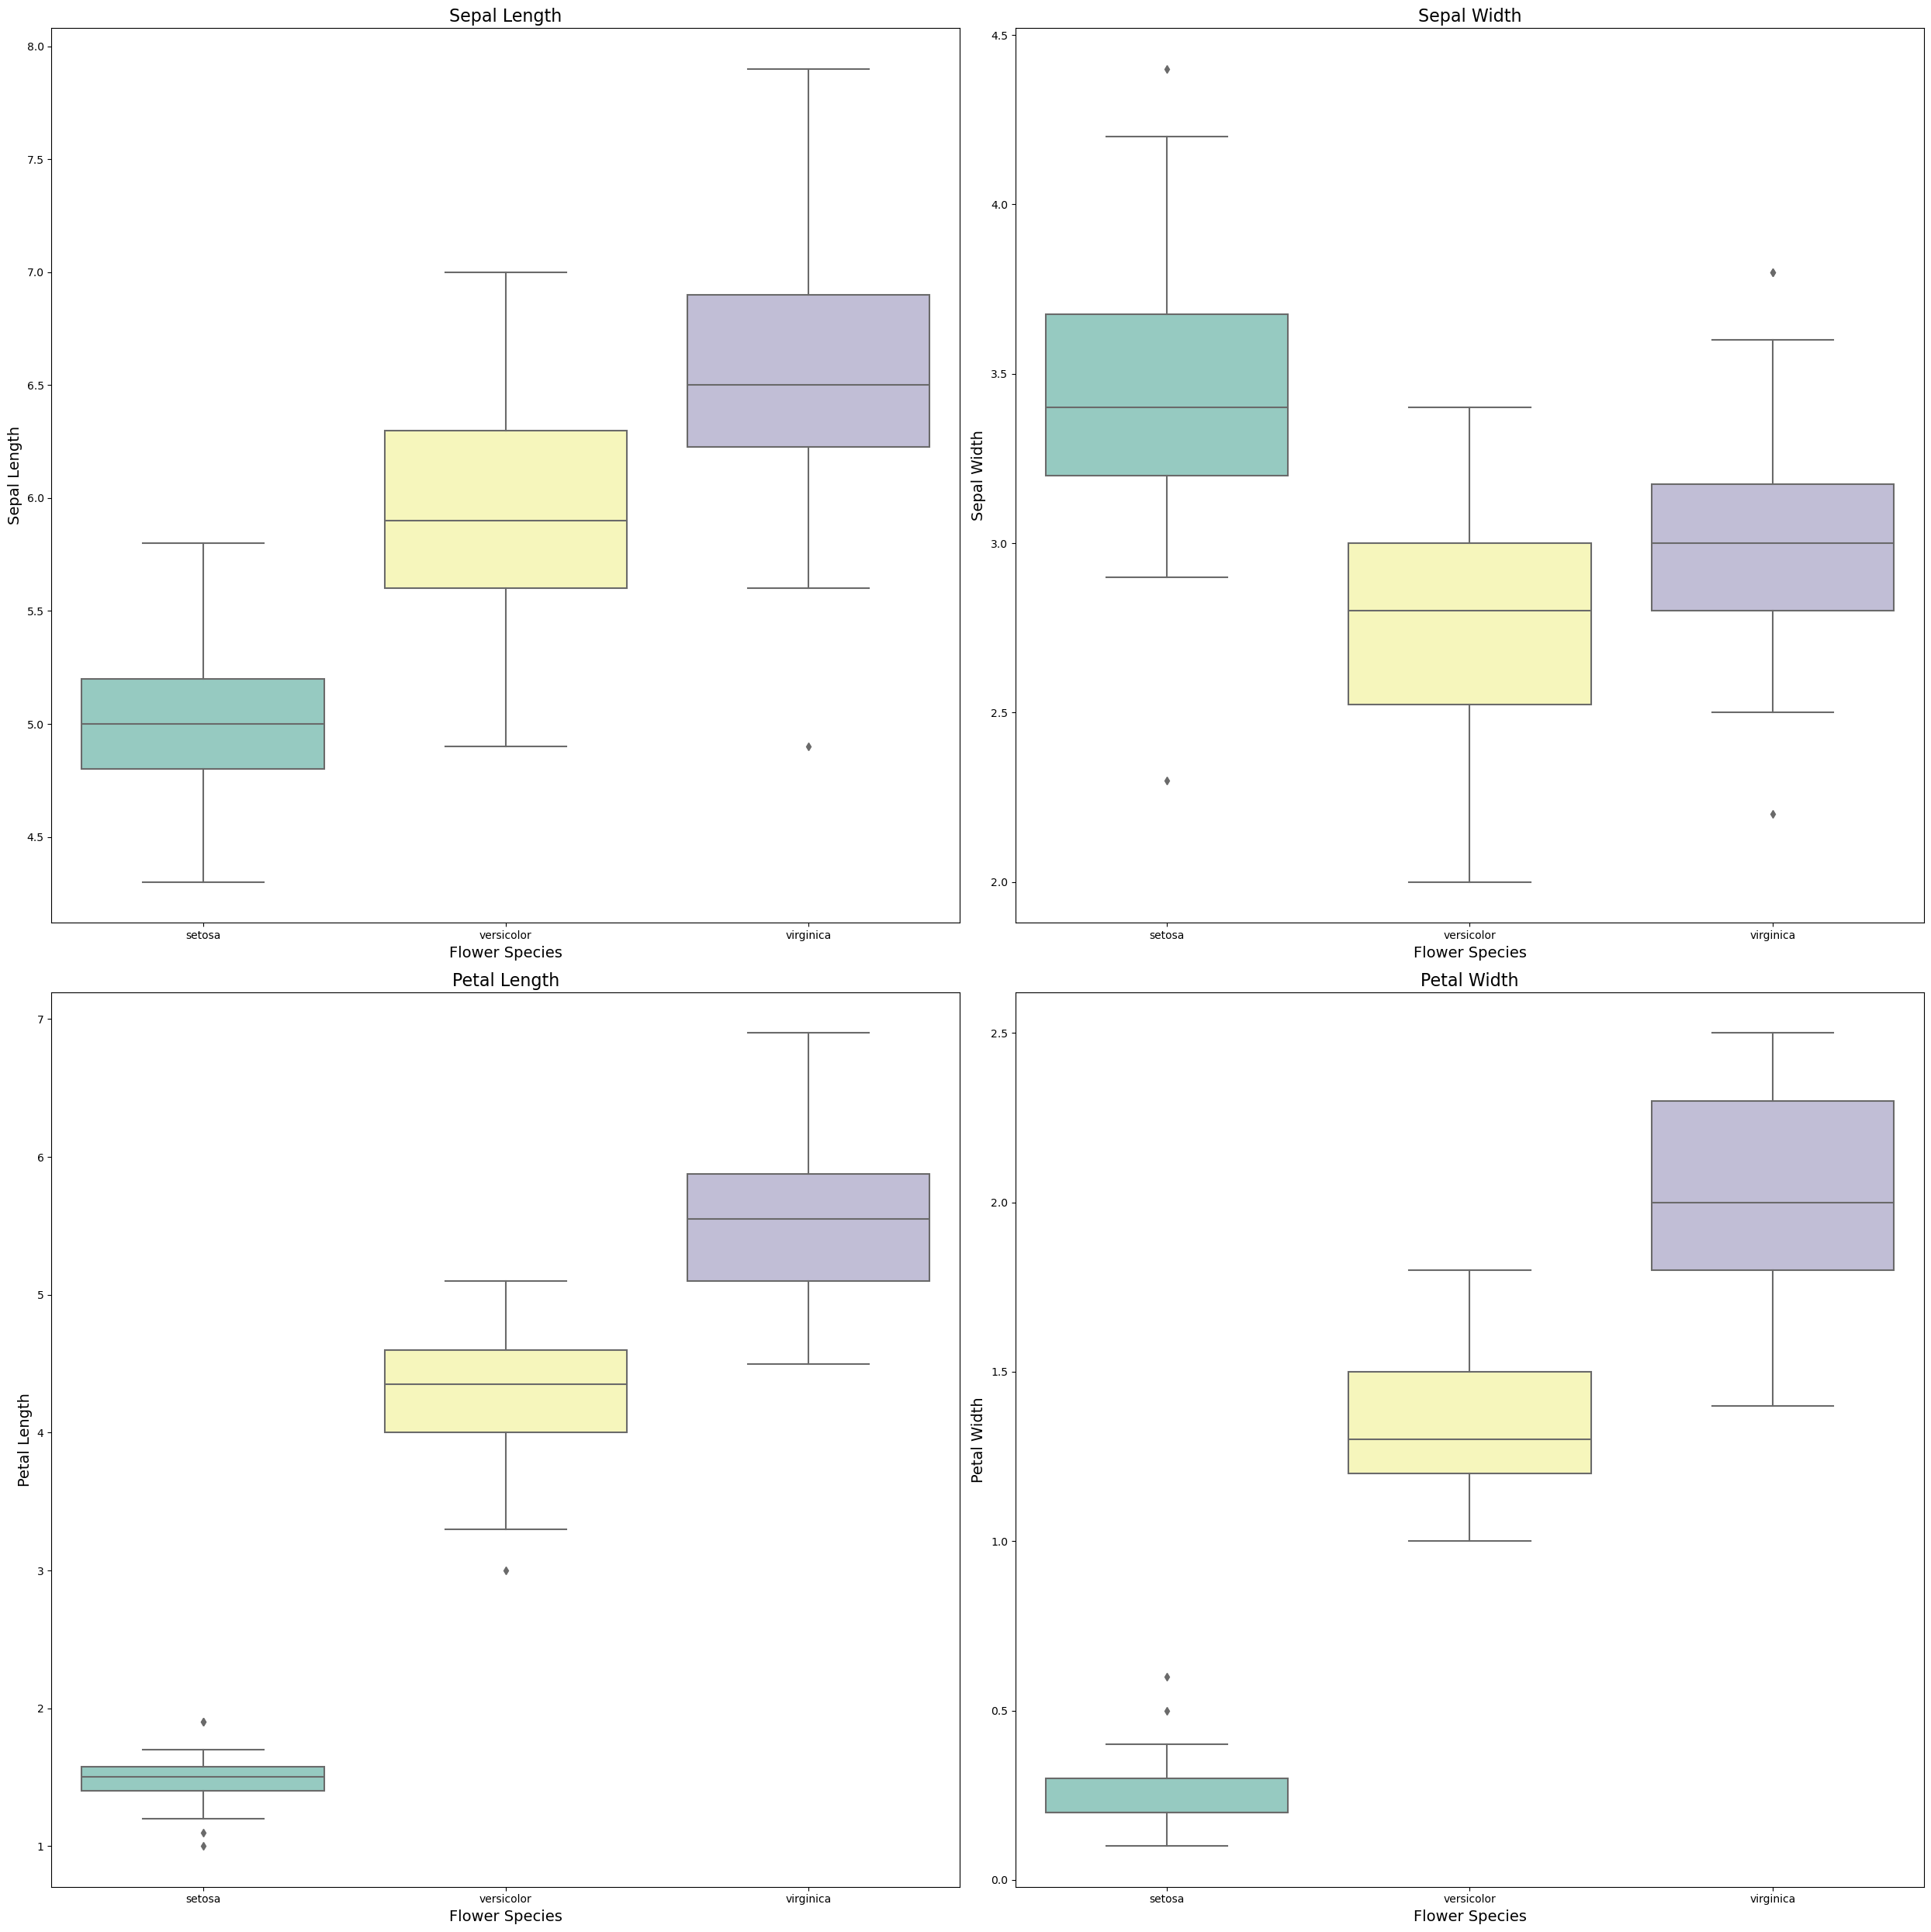

In [89]:
a, ax = plt.subplots(2, 2, # Creating a sub plot and 
                    figsize=(25, 25)) # Creating the size of the sub plot
sns.boxplot(x="species", # Creating a box plot where species is on the x-axis
            y="sepal_length", # Setting the sepal length to be on the y-axis
            data=df, # Using data from the data frame
            ax=ax[0, 0], # Setting the axis this plot is to be on
            palette='Set3') # Setting the color pallette to use
ax[0, 0].set_title('Sepal Length', size=16) # Setting the title of the plot and the size
ax[0, 0].set_xlabel('Flower Species', size=14) # Setting the title of the x-axis and the size
ax[0, 0].set_ylabel('Sepal Length', size=14) # Setting the title of the y-axis and the size

sns.boxplot(x="species", # Creating a box plot where species is on the x-axis
            y="sepal_width", # Setting the sepal width to be on the y-axis
            data=df, # Using data from the data frame
            ax=ax[0, 1], # Setting the axis this plot is to be on
            palette='Set3') # Setting the color pallette to use
ax[0, 1].set_title('Sepal Width', size=16) # Setting the title of the plot and the size
ax[0, 1].set_xlabel('Flower Species', size=14) # Setting the title of the x-axis and the size
ax[0, 1].set_ylabel('Sepal Width', size=14) # Setting the title of the y-axis and the size

sns.boxplot(x="species", # Creating a box plot where species is on the x-axis
            y="petal_length", # Setting the petal length to be on the y-axis
            data=df, # Using data from the data frame
            ax=ax[1, 0], # Setting the axis this plot is to be on
            palette='Set3') # Setting the color pallette to use
ax[1, 0].set_title('Petal Length', size=16) # Setting the title of the plot and the size
ax[1, 0].set_xlabel('Flower Species', size=14) # Setting the title of the x-axis and the size
ax[1, 0].set_ylabel('Petal Length', size=14) # Setting the title of the y-axis and the size

sns.boxplot(x="species", # Creating a box plot where species is on the x-axis
            y="petal_width", # Setting the petal width to be on the y-axis
            data=df, # Using data from the data frame
            ax=ax[1, 1], # Setting the axis this plot is to be on
            palette='Set3') # Setting the color pallette to use
ax[1, 1].set_title('Petal Width', size=16) # Setting the title of the plot and the size
ax[1, 1].set_xlabel('Flower Species', size=14) # Setting the title of the x-axis and the size
ax[1, 1].set_ylabel('Petal Width', size=14) # Setting the title of the y-axis and the size

plt.tight_layout() # Setting a tight layout so the subplot adjusts as required
plt.savefig(os.path.join(dist_path, 'BoxPlot.png')) # Saving the plot to the desired folder
plt.show() # Showing the plot

### Correlation Analysis

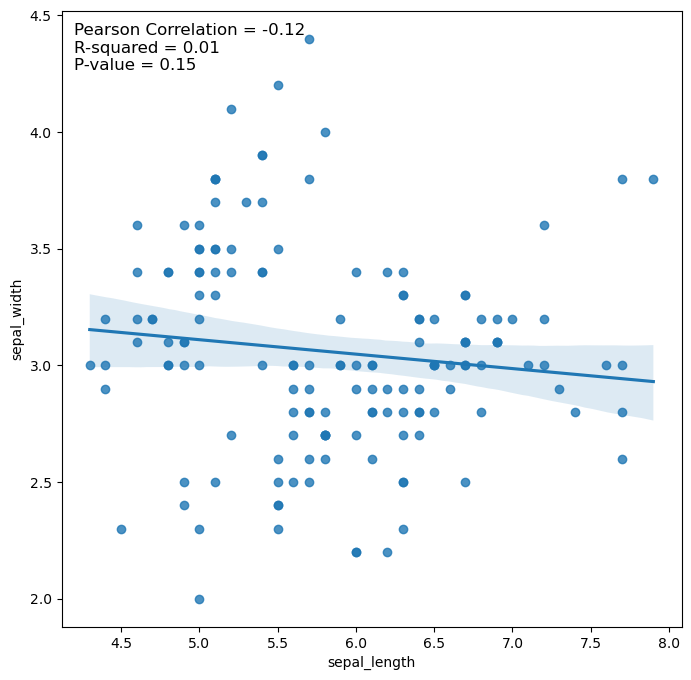

In [90]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_length", y="sepal_width") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_length"], df["sepal_width"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

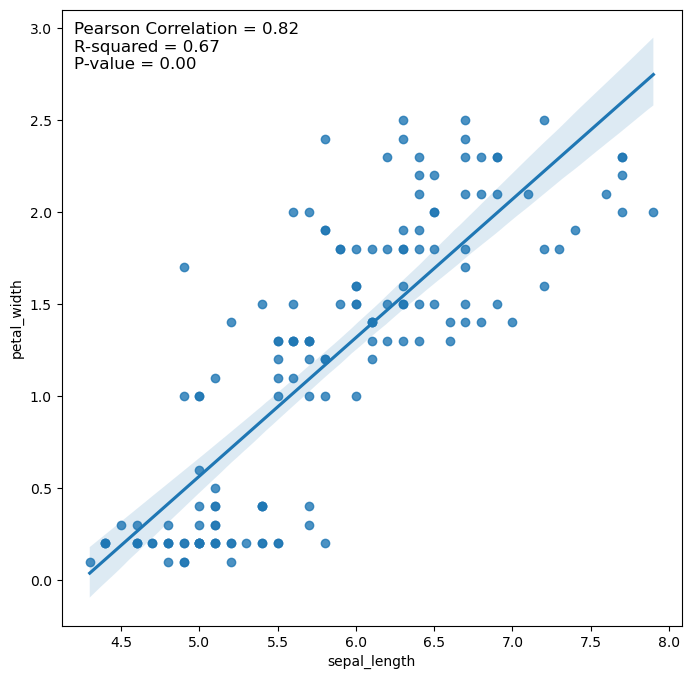

In [91]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_length", y="petal_width") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_length"], df["petal_width"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

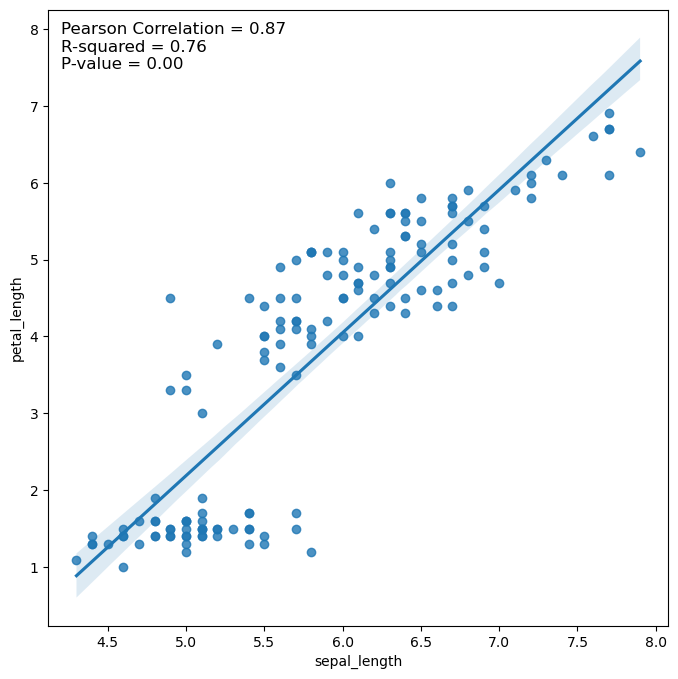

In [92]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_length", y="petal_length") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_length"], df["petal_length"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

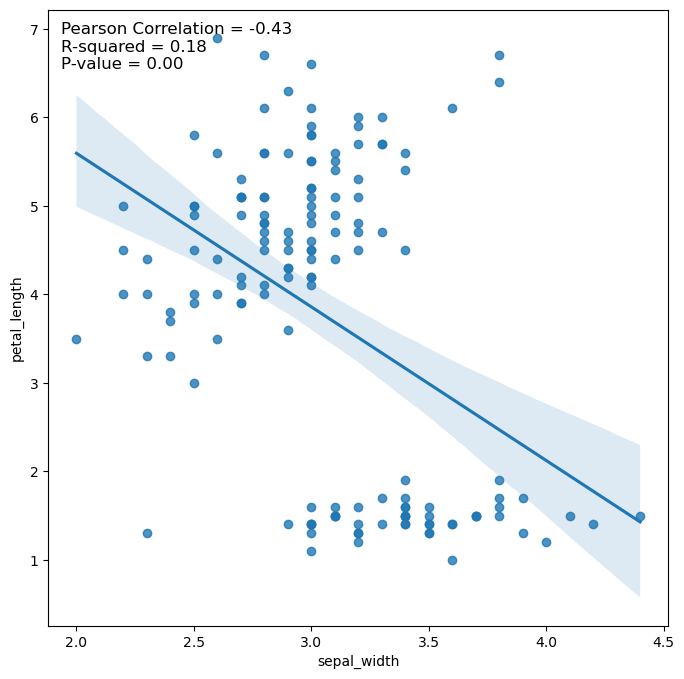

In [93]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_width", y="petal_length") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_width"], df["petal_length"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

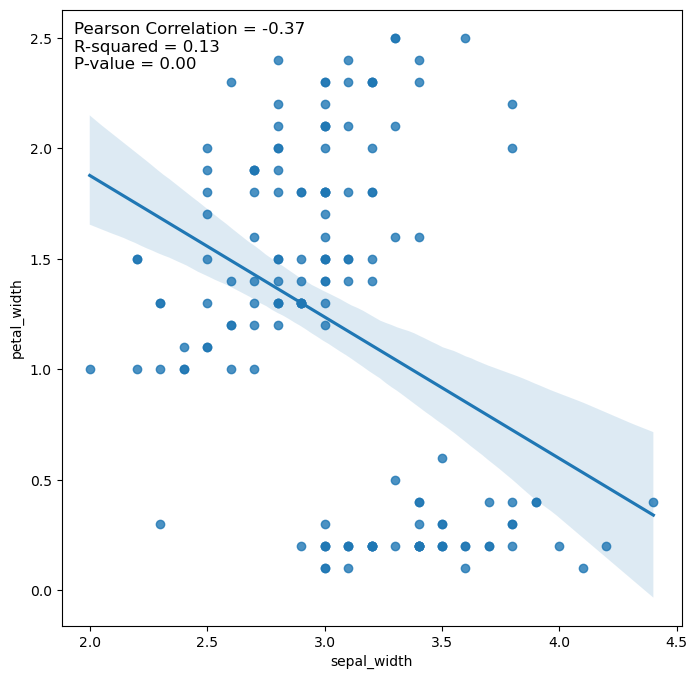

In [94]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_width", y="petal_width") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_width"], df["petal_width"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

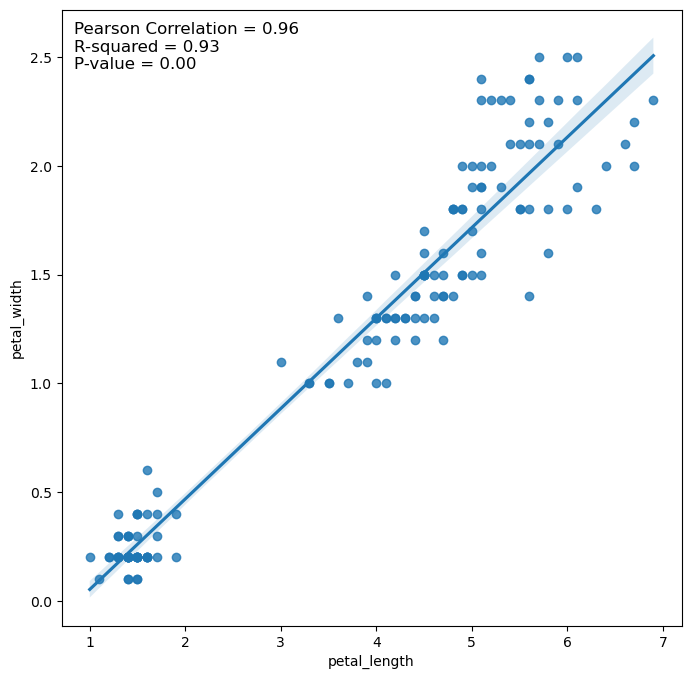

In [95]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="petal_length", y="petal_width") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["petal_length"], df["petal_width"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

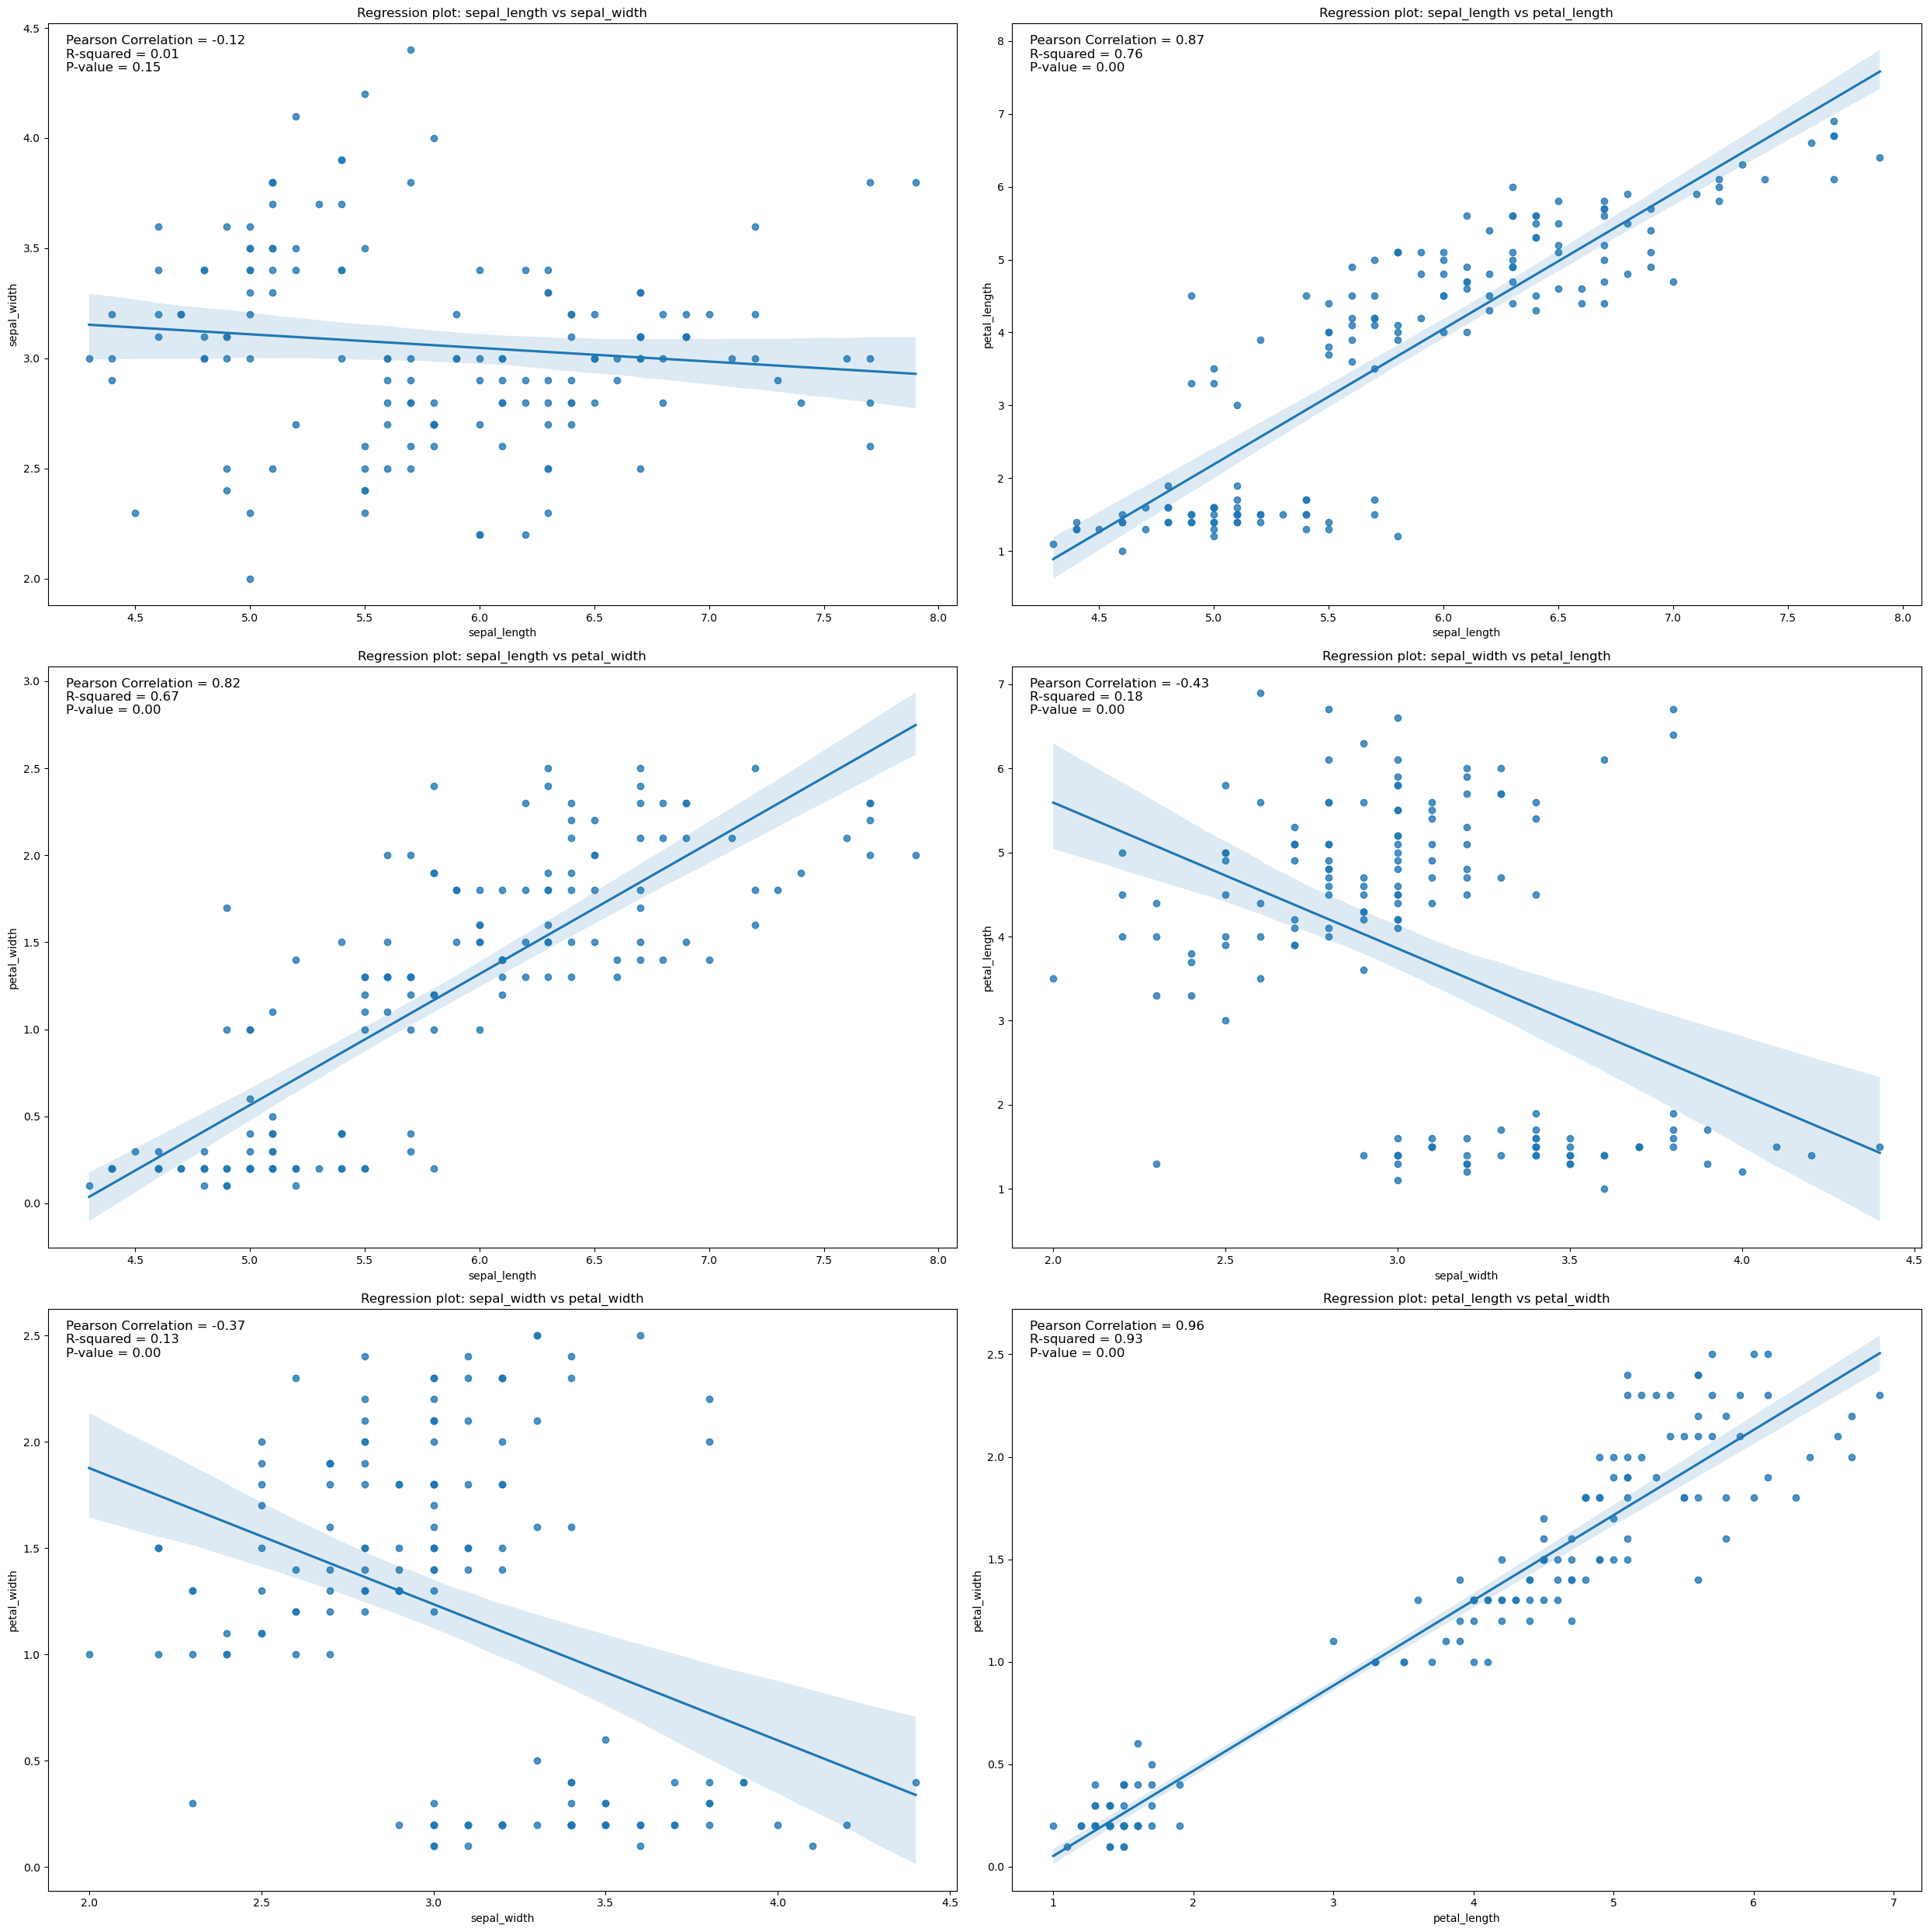

In [96]:
numeric_df = df.select_dtypes(include=[np.number])
# Get all combinations of numeric columns
column_combinations = list(combinations(numeric_df.columns, 2))

# Create a 3 by 2 subplot and add regression plots for each combination of numeric variables
fig, axes = plt.subplots(3, 2, figsize=(25, 25))

for i, ax in enumerate(axes.flatten()):
    if i < len(column_combinations):
        x_column, y_column = column_combinations[i]
        
        sns.regplot(data=numeric_df, x=x_column, y=y_column, ax=ax)
        
        r_value, p_value = stats.pearsonr(numeric_df[x_column], numeric_df[y_column])
        r_squared = r_value**2
        
        ax.text(0.02, 0.98,
                f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",
                transform=ax.transAxes,
                fontsize=12,
                va='top')
        
        ax.grid(False)
        ax.set_xlabel(x_column)
        ax.set_ylabel(y_column)
        ax.set_title(f'Regression plot: {x_column} vs {y_column}')

# Remove empty subplots
for i in range(len(column_combinations), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.savefig(os.path.join(corr_path, 'Scatter.png'))
plt.show()


In [97]:
def create_table_dist():
    skewness = numeric_df.skew()
    kurtosis = numeric_df.kurt()
    mean_val = numeric_df.mean()
    median_val = numeric_df.median()
    
    table = pd.DataFrame({
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Mean': mean_val,
        'Median': median_val
    })
    
    return table

In [98]:
# Create table for all numeric variables
table = create_table_dist()

# Display table
table
    

,Skewness,Kurtosis,Mean,Median
sepal_length,0.314911,-0.552064,5.843333,5.80
sepal_width,0.318966,0.228249,3.057333,3.00
petal_length,-0.274884,-1.402103,3.758000,4.35
petal_width,-0.102967,-1.340604,1.199333,1.30


In [99]:
# Convert DataFrame to a formatted string
dist_summary_txt = table.to_string(float_format='%.2f')

# Save formatted string to a text file
file_path = os.path.join(folder_path, 'distribution_summary_statistics.txt')
with open(file_path, 'w') as file:
    file.write(dist_summary_txt)

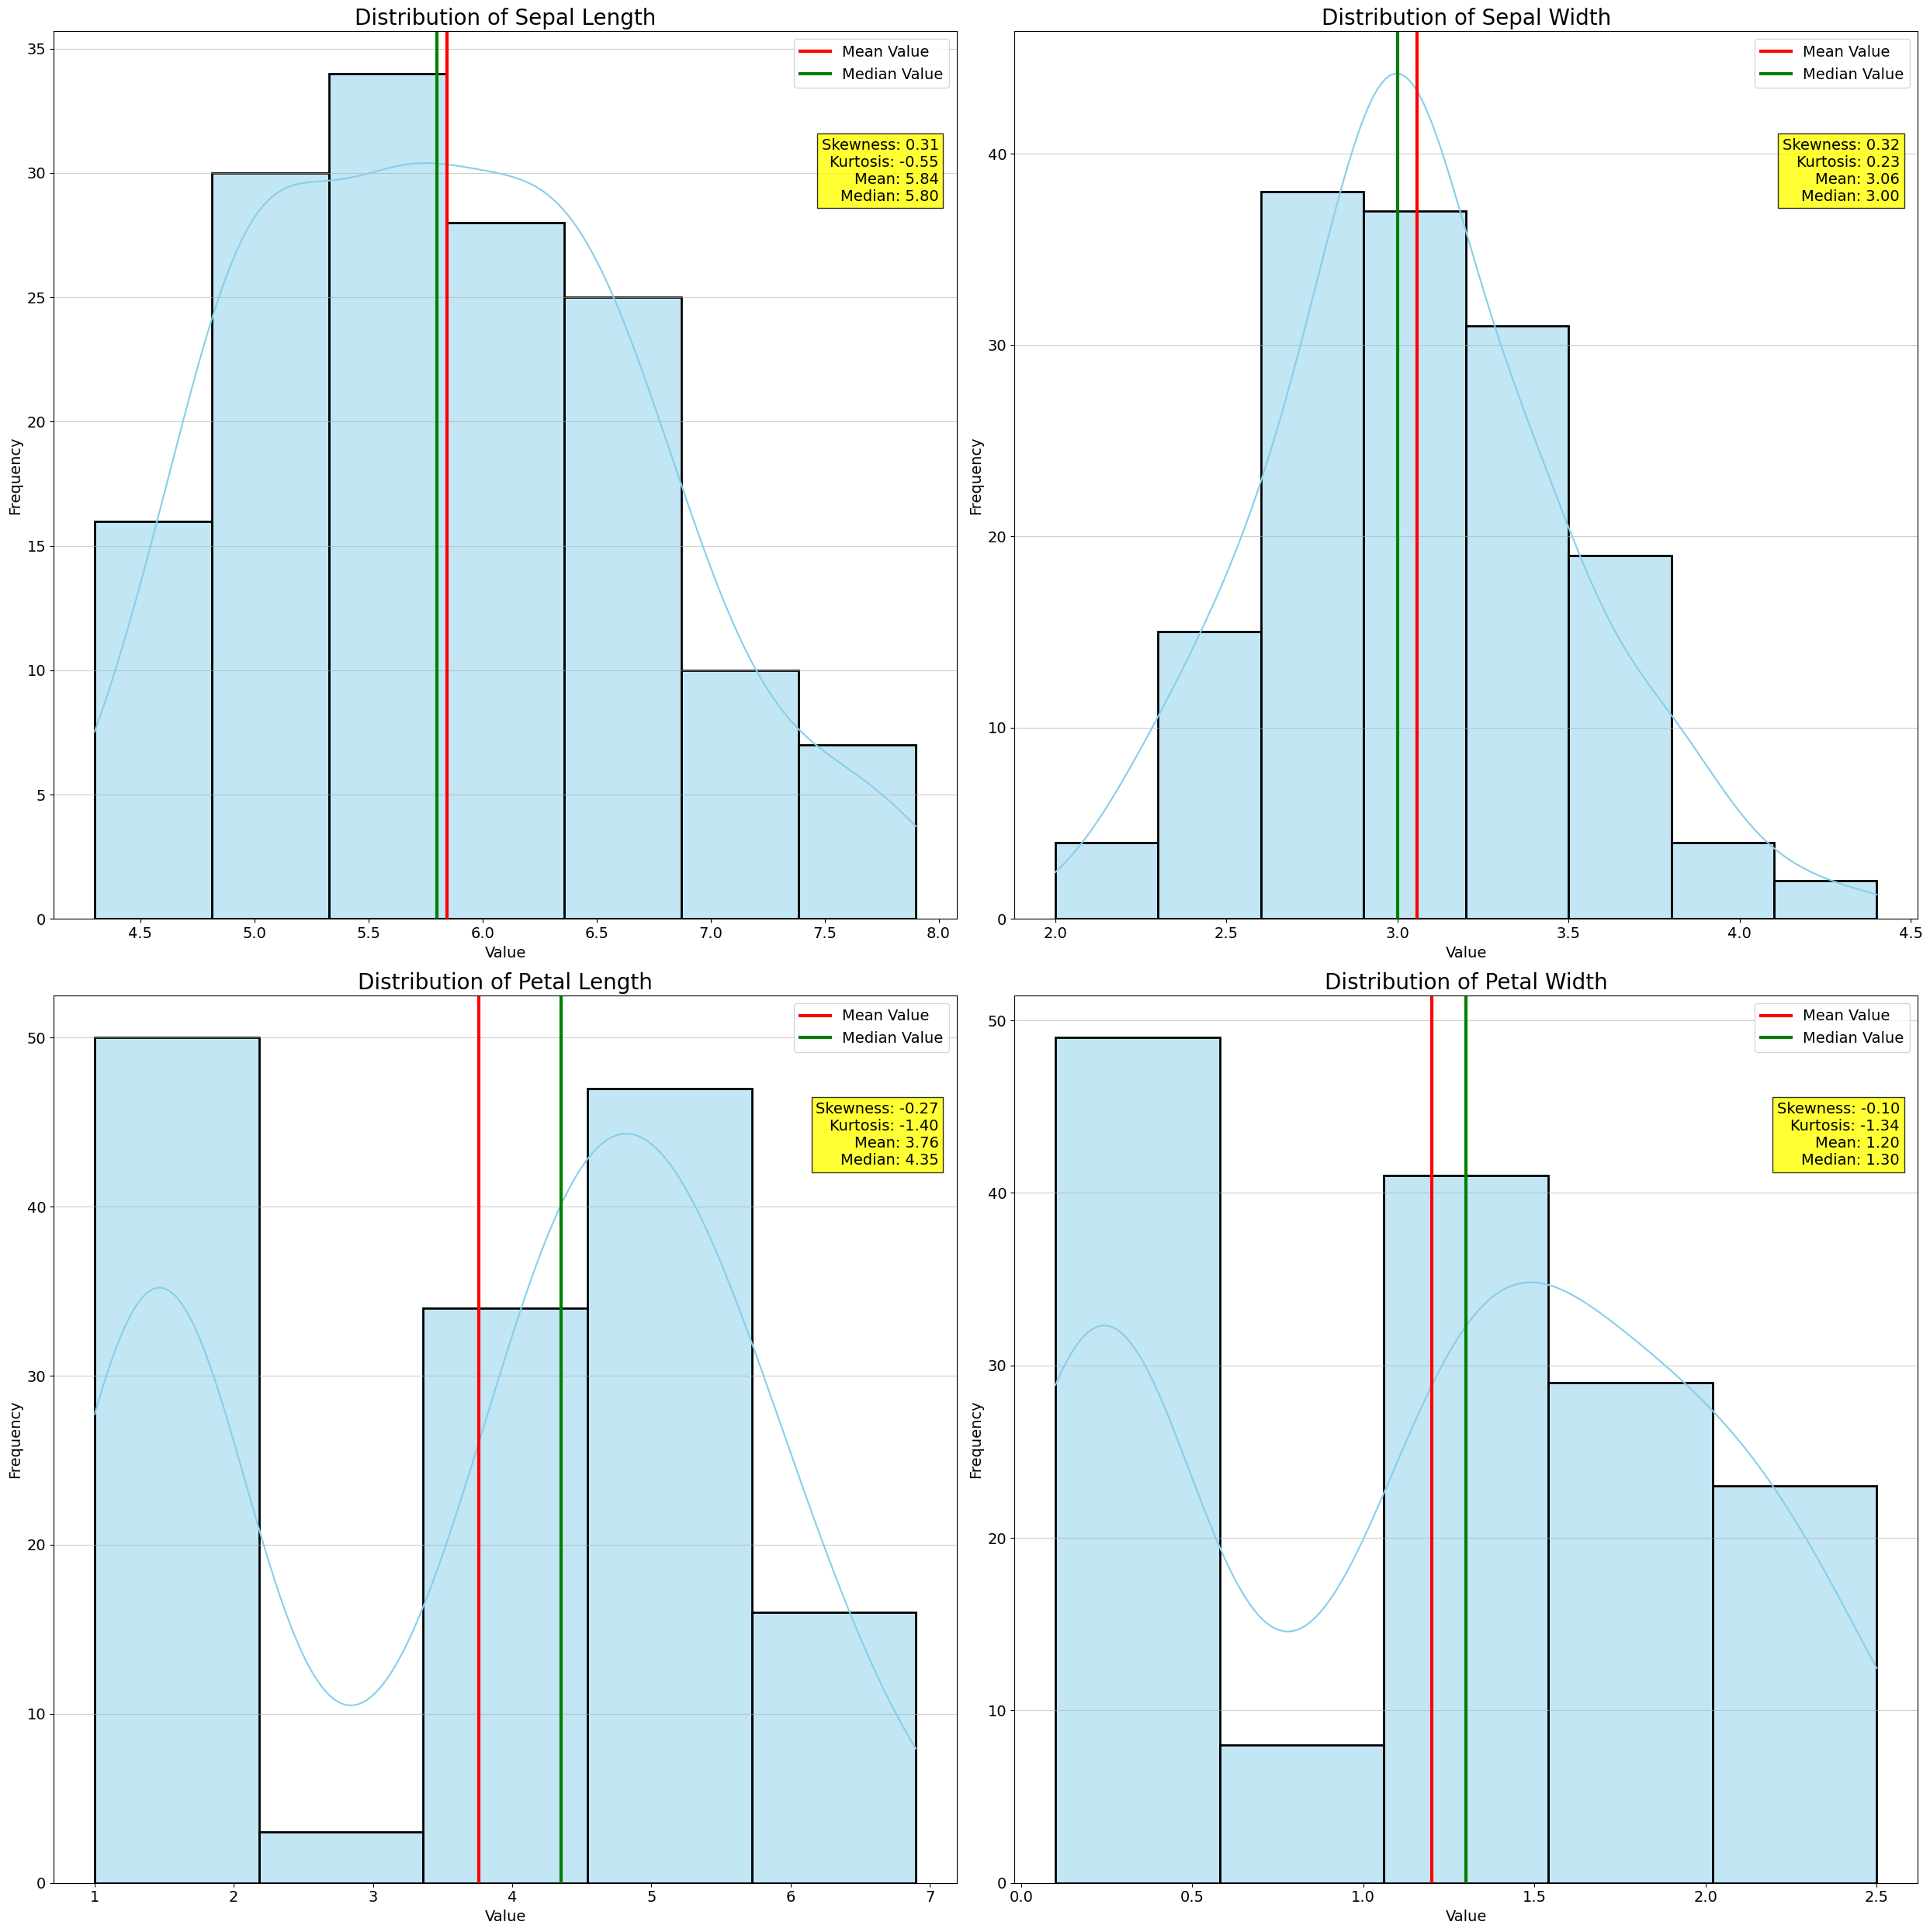

In [100]:
def plot_distribution(data, title, bin_size):
    # Plotting the distribution
    sns.histplot(data, kde=True, bins=bin_size, color='skyblue', edgecolor='black', linewidth=2)
    
    # Adding mean and median lines
    mean_val = data.mean()
    median_val = data.median()
    plt.axvline(x=mean_val, label='Mean Value', color='red', linewidth=3, linestyle='-')
    plt.axvline(x=median_val, label='Median Value', color='green', linewidth=3, linestyle='-')

    # Adding skewness, kurtosis, mean, and median to the plot
    skewness = data.skew()
    kurtosis = data.kurt()
    plt.text(0.98, 0.88, f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean_val:.2f}\nMedian: {median_val:.2f}', 
             transform=plt.gca().transAxes, fontsize=14, 
             bbox=dict(facecolor='yellow', alpha=0.8),
             verticalalignment='top', horizontalalignment='right')

    # Plot formatting
    plt.title(title, size=20)
    plt.xlabel('Value', size=14)
    plt.ylabel('Frequency', size=14)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.grid(axis='y', linestyle='-', alpha=0.6)
    plt.legend(fontsize=14)

# Create subplots
plt.figure(figsize=(25, 25))  # Setting the size of the plot

plt.subplot(2, 2, 1)
plot_distribution(df['sepal_length'], 'Distribution of Sepal Length', bin_size=7)

plt.subplot(2, 2, 2)
plot_distribution(df['sepal_width'], 'Distribution of Sepal Width', bin_size=8)

plt.subplot(2, 2, 3)
plot_distribution(df['petal_length'], 'Distribution of Petal Length', bin_size=5)

plt.subplot(2, 2, 4)
plot_distribution(df['petal_width'], 'Distribution of Petal Width', bin_size=5)

# Show plot
plt.tight_layout()
plt.savefig(os.path.join(dist_path, 'Histogram.png'))
plt.show()


https://realpython.com/numpy-scipy-pandas-correlation-python/ - # r_value, p_value = stats.pearsonr(df["petal_length"], df["petal_width"])

In [101]:
results = []
for col1, col2 in column_combinations:
    r_value, p_value = stats.pearsonr(numeric_df[col1], numeric_df[col2])
    r_squared = r_value**2
    
    results.append({
        'Variable 1': col1,
        'Variable 2': col2,
        'Pearson r-value': r_value,
        'P-value': p_value,
        'R-squared': r_squared
    })


In [102]:
# Create table
result_df = pd.DataFrame(results)

# Display table
result_df

,Variable 1,Variable 2,Pearson r-value,P-value,R-squared
0,sepal_length,sepal_width,-0.117570,1.518983e-01,0.013823
1,sepal_length,petal_length,0.871754,1.038667e-47,0.759955
2,sepal_length,petal_width,0.817941,2.325498e-37,0.669028
3,sepal_width,petal_length,-0.428440,4.513314e-08,0.183561
4,sepal_width,petal_width,-0.366126,4.073229e-06,0.134048
5,petal_length,petal_width,0.962865,4.675004e-86,0.927110


In [103]:
# Convert DataFrame to a formatted string
corr_summary_txt = result_df.to_string(float_format='%.2f')

# Save formatted string to a text file
file_path = os.path.join(folder_path, 'correlation_summary_statistics.txt')
with open(file_path, 'w') as file:
    file.write(corr_summary_txt)

## References
****

### <a id='toc1_6_3_'></a>[Links to websites, blogs and documentation:](#toc0_)
- For reading in the Python data from Seaborn : https://seaborn.pydata.org/generated/seaborn.load_dataset.html
- For getting the current directory: https://www.freecodecamp.org/news/python-get-current-directory/
- For creating the folders to be saved to the directory: https://www.geeksforgeeks.org/create-a-directory-in-python/
- For viewing a summary of the data e.g. .head & .describe methods: https://pandas.pydata.org/docs/user_guide/10min.html#basic-data-structures-in-pandas
- For identifying rows that have null values: https://datatofish.com/rows-with-nan-pandas-dataframe/
- For creating a list of lists: https://www.geeksforgeeks.org/python-list-of-lists/
- For creating the table of the data: https://medium.com/@HeCanThink/tabulate-your-go-to-solution-for-stylish-tables-in-python-35ede5145e28 & https://pypi.org/project/tabulate/
- For defining categorical variables: https://www.geeksforgeeks.org/python-pandas-categorical/ & https://pandas.pydata.org/docs/user_guide/categorical.html
- For identifying strings: https://www.geeksforgeeks.org/python-string/
- For identifying numerical variables & floats: https://www.w3schools.com/python/ref_func_float.asp & https://www.geeksforgeeks.org/float-in-python/
- For the background of the dataset: https://towardsdatascience.com/the-iris-dataset-a-little-bit-of-history-and-biology-fb4812f5a7b5
- For the string formatting: https://www.geeksforgeeks.org/python-pandas-dataframe-to_string/
- For reading and writing the file: https://www.freecodecamp.org/news/python-write-to-file-open-read-append-and-other-file-handling-functions-explained/ & https://www.geeksforgeeks.org/reading-writing-text-files-python/
- Foe Pandas set option: https://pandas.pydata.org/docs/reference/api/pandas.set_option.html
- For inline code of variables: https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd
- For Bounding box: https://pythonhosted.org/planar/bbox.html
- For saving the figure as a png: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html & https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
- For setting the Figure Size: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
- For creating the subplot: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
- For the axis: https://www.geeksforgeeks.org/matplotlib-axes-axes-axis-in-python/ & https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axis.html
- For creating the dataframe with headers: https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/
- For using the tabulate function/library: https://pypi.org/project/tabulate/
- For creating the table: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.table.html
- For fonts on the table: https://matplotlib.org/stable/api/table_api.html
- For iterrows: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html
- For creating the Bar Chart : https://seaborn.pydata.org/generated/seaborn.barplot.html
- For setting labels & titles: https://matplotlib.org/stable/tutorials/pyplot.html
- For creating the for loops: Andrew Beatty Class Notes & https://www.w3schools.com/python/python_for_loops.asp
- For the patches element and how to use it: https://matplotlib.org/stable/api/patches_api.html & https://e2eml.school/matplotlib_patches & https://www.geeksforgeeks.org/how-to-add-a-patch-in-a-plot-in-python/
- For the annotate element and how it is used: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html & https://www.geeksforgeeks.org/matplotlib-pyplot-annotate-in-python/
- For the get_height, get_width, get_x parameters within Patches: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html & https://stackoverflow.com/questions/58325443/how-to-annotate-bar-chart-with-values-different-to-those-from-get-height
- For groupby function: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html
- For disabling tick marks: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html
- For creating the Countplot: https://seaborn.pydata.org/generated/seaborn.countplot.html
- For creating Histplot: https://seaborn.pydata.org/generated/seaborn.histplot.html
- For adding the Mean and Median lines to the Histogram: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html & https://www.geeksforgeeks.org/matplotlib-pyplot-axvline-in-python/
- For adding Skewness/ Kurtosis/ Mean/ Median: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html & https://www.geeksforgeeks.org/python-pandas-dataframe-skew/
- For creating the Correlation Matrix Table: https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/
- For creating the Pairplot: https://seaborn.pydata.org/generated/seaborn.pairplot.html
- For creating Regression Plot: https://seaborn.pydata.org/generated/seaborn.regplot.html
- For creating the new dataframe:  https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
- For calculating Correlation Coefficients: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- For calculating Pearsons Coefficient and adding it to the Regression Plot: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
- For text for the Regression Plot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
- For scatterplot: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- For plotly scatterplot graph: https://plotly.com/python/line-and-scatter/
- For interpreting Scatter Plots: https://www.texasgateway.org/resource/interpreting-scatterplots & https://www.tableau.com/data-insights/reference-library/visual-analytics/charts/scatter-plots#:~:text=First%2C%20to%20read%20a%20scatter,along%20a%20line%20or%20curve
- For interpreting correlation: https://www.geeksforgeeks.org/exploring-correlation-in-python/
- For interpreting the Regplot: https://www.linkedin.com/advice/0/how-can-you-interpret-slope-regression-line-skills-statistics-1lnje#:~:text=The%20slope%20of%20a%20regression%20line%20indicates%20the%20rate%20of,increase%20in%20the%20dependent%20variable. & https://towardsdatascience.com/python-statistics-for-beginners-pearson-correlation-coefficient-69c9b1ef17f7 & https://towardsdatascience.com/regression-plots-in-python-with-seaborn-118472b12e3d#:~:text=The%20regression%20line%20is%20an,line%20is%20the%20confidence%20interval. & https://stackoverflow.com/questions/61522386/sns-regplot-shows-a-shaded-area-for-the-regression-which-does-not-make-sense & https://www.youtube.com/watch?v=Smh7ujDbYyg & https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf & https://courses.lumenlearning.com/suny-natural-resources-biometrics/chapter/chapter-7-correlation-and-simple-linear-regression/
- For the line of best fit: https://www.investopedia.com/terms/l/line-of-best-fit.asp#:~:text=The%20line%20of%20best%20fit%20estimates%20a%20straight%20line%20that,and%20independent%20variable(s). & https://www.tableau.com/data-insights/reference-library/visual-analytics/charts/scatter-plots#:~:text=First%2C%20to%20read%20a%20scatter,along%20a%20line%20or%20curve.
- For adding in and interpreting P-Values: https://realpython.com/numpy-scipy-pandas-correlation-python/
- For readme file: https://www.freecodecamp.org/news/how-to-write-a-good-readme-file/ & https://www.hatica.io/blog/best-practices-for-github-readme/ & https://www.archbee.com/blog/readme-document-elements
- For readme sub headings in table of contents: https://gist.githubusercontent.com/jonschlinkert/ac5d8122bfaaa394f896/raw/bd1106691cf344e972f575c49ba3cf281beeb9b3/markdown-toc_repeated-headings.md
- For understanding the license for the project: https://choosealicense.com/ & https://gist.github.com/lukas-h/2a5d00690736b4c3a7ba
- For creating a heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html
- For understanding confidence intervals: https://realpython.com/linear-regression-in-python/ & https://bcheggeseth.github.io/Stat155Notes/confidence-intervals.html
- For calculating r squared Value: https://medium.com/swlh/covariance-correlation-r-sqaured-5cbefc5cbe1c & https://towardsdatascience.com/r%C2%B2-or-r%C2%B2-when-to-use-what-4968eee68ed3
- For Linregress: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
- For interpreting r squared value: https://www.researchgate.net/post/what_is_the_acceptable_r-squared_value
